In [1]:
#pip install pyscopus==1.0.3a2

In [1]:
import pyscopus
import numpy as np
import pandas as pd
import json
import glob

pyscopus.__version__

'1.0.3a2'

In [2]:
from pyscopus import Scopus
from newspaper import Article
from newspaper import Config
import nltk
from tqdm import tqdm


In [ ]:
##########################################################################################################

In [3]:
key = 'ee659c89771d089db3ae0116fd8a5050'


In [4]:
scopus = Scopus(key)


In [5]:
#here we select 100 articles to retrieve based on "supply chain risk management"
search_df = scopus.search("KEY(supply chain risk management)", count=10)


In [6]:
'''list=[]
search_df['full_text']= search_df['full_text'].astype(str)
#preprocess the data texts and get rid of the nan values.
search_df = search_df[search_df['full_text'].notna()]
user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'

config = Config()
config.browser_user_agent = user_agent

for ind in tqdm(search_df.index):
    dict={}
    article = Article(search_df['full_text'][ind],config=config)
    try:
        article.download()
        article.parse()
        article.nlp()
        dict['Date']=search_df['cover_date'][ind]
        dict['Title']=article.title
        dict['Article']=article.text
        dict['Summary']=article.summary
        list.append(dict)
    except:
        pass 
scopus_df=pd.DataFrame(list)
'''

"list=[]\nsearch_df['full_text']= search_df['full_text'].astype(str)\n#preprocess the data texts and get rid of the nan values.\nsearch_df = search_df[search_df['full_text'].notna()]\nuser_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'\n\nconfig = Config()\nconfig.browser_user_agent = user_agent\n\nfor ind in tqdm(search_df.index):\n    dict={}\n    article = Article(search_df['full_text'][ind],config=config)\n    try:\n        article.download()\n        article.parse()\n        article.nlp()\n        dict['Date']=search_df['cover_date'][ind]\n        dict['Title']=article.title\n        dict['Article']=article.text\n        dict['Summary']=article.summary\n        list.append(dict)\n    except:\n        pass \nscopus_df=pd.DataFrame(list)\n"

In [7]:
search_df['full_text'][3]

'https://api.elsevier.com/content/article/eid/1-s2.0-S0957417422006522'

In [8]:
print(search_df.head(10))


     scopus_id                                              title  \
0  85112322064  Resilience in interorganizational networks: de...   
1  85122498467  Indicators for the optimization of sustainable...   
2  85119284303  Demand information sharing in a two-echelon su...   
3  85129764054  Bi-objective stochastic model for the design o...   
4  85129026991  Integrated inventory and transportation manage...   
5  85131057052  Trust and security of electric vehicle-to-grid...   
6  85130518586  Proof by Earnestness (PoE) to determine the au...   
7  85131596061  Quality Control for Offsite Construction: Revi...   
8  85129302778  Analysis of international nickel flow based on...   
9  85130622627  A Cross-disciplinary review of product recall ...   

                                    publication_name      issn  isbn  \
0                            Supply Chain Management  13598546  None   
1                 Energy, Sustainability and Society      None  None   
2  International Transac

In [10]:
#retrieving full text from the link of each article

full_text_link_arr = search_df.full_text.values
#full_text_link_arr
search_df["texts"]=0

for i in search_df.index:
    if full_text_link_arr[i]!= None:# some cells are empty or contain None values
        search_df["texts"][i]=(scopus.retrieve_full_text(full_text_link_arr[i]))
    else:
        search_df["texts"][i]=(None)
    

<ipython-input-10-ec946366cdfe>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  search_df["texts"][i]=(None)
<ipython-input-10-ec946366cdfe>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  search_df["texts"][i]=(scopus.retrieve_full_text(full_text_link_arr[i]))
C:\Users\apoko\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [11]:
search_df.head()

scopus_id                                              title  \
0  85112322064  Resilience in interorganizational networks: de...   
1  85122498467  Indicators for the optimization of sustainable...   
2  85119284303  Demand information sharing in a two-echelon su...   
3  85129764054  Bi-objective stochastic model for the design o...   
4  85129026991  Integrated inventory and transportation manage...   

                                    publication_name      issn  isbn  \
0                            Supply Chain Management  13598546  None   
1                 Energy, Sustainability and Society      None  None   
2  International Transactions in Operational Rese...  09696016  None   
3                   Expert Systems with Applications  09574174  None   
4                   Expert Systems with Applications  09574174  None   

      eissn volume page_range  cover_date                         doi  \
0      None     27      64-78  2022-12-19    10.1108/SCM-03-2021-0136   
1  21920567     12       None  2022-12-01  10.1186/s13705-021-00323-3   
2  14753995     29  3657-3680  2022-11-01          10.1111/itor.13083   
3      None    202       None  2022-09-15  10.1016/j.eswa.2022.117285   
4      None    202       None  2022-09-15  10.1016/j.eswa.2022.117156   

   citation_count                                        affiliation  \
0               0  [{'name': 'Rijksuniversiteit Groningen', 'city...   
1               1  [{'name': 'Fachhochschule Münster', 'city': 'M...   
2               0  [{'name': 'Zhejiang University of Technology',...   
3               0  [{'name': 'Universidad Autonoma de Coahuila', ...   
4               0  [{'name': 'University of Melbourne', 'city': '...   

  aggregation_type subtype_description  \
0          Journal             Article   
1          Journal             Article   
2          Journal             Article   
3          Journal             Article   
4          Journal             Article   

                                             authors  \
0             [57224456545, 56400370400, 6602736474]   
1                         [57193120686, 55075444000]   
2  [24179184900, 57344135900, 56610951900, 573439...   
3            [57194525410, 54987295000, 38760941100]   
4  [57652421100, 57655177800, 13410836100, 571887...   

                                           full_text  \
0                                               None   
1                                               None   
2                                               None   
3  https://api.elsevier.com/content/article/eid/1...   
4  https://api.elsevier.com/content/article/eid/1...   

                                               texts  
0                                                NaN  
1                                                NaN  
2                                                NaN  
3  serial JL 271506 291210 291817 291820 291862 2...  
4  serial JL 271506 291210 291817 291820 291862 2...

In [12]:
search_df.to_csv("search_result.csv")

In [13]:
#search_df.to_json("df.json")

In [ ]:
##############################################################################################

In [ ]:
##########################-----------START HERE -----------------------#######################

In [6]:
search_df = pd.read_csv('search_result.csv')


In [12]:
search_df['title'][9]

'A Cross-disciplinary review of product recall research: A stakeholder-stage framework'

In [37]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemmatizer = WordNetLemmatizer()

In [38]:
sentences=[]
search_df['texts']= search_df['texts'].astype(str)

for i in search_df['texts'].index:
    sentences.append(nltk.sent_tokenize(search_df.texts[i]))
sentences

[['nan'],
 ['nan'],
 ['nan'],
 ['serial JL 271506 291210 291817 291820 291862 291866 291870 291883 31 Expert Systems with Applications EXPERTSYSTEMSAPPLICATIONS 2022-04-29 2022-04-29 2022-05-09 2022-05-09 2022-06-07T10:58:41 1-s2.0-S0957417422006522 S0957-4174(22)00652-2 S0957417422006522 10.1016/j.eswa.2022.117285 S300 S300.1 FULL-TEXT 1-s2.0-S0957417422X00110 2022-06-07T10:24:35.054899Z 0 0 20220915 2022 2022-04-29T06:27:34.594671Z absattachment articleinfo articlenumber articletitlenorm authfirstinitialnorm authfirstsurnamenorm cid cids contenttype copyright crossmark dateloaded dateloadedtxt datesearch datesort dateupdated dco docsubtype doctype doi eid ewtransactionid hubeid indexeddate issn issnnorm itemstage itemtransactionid itemweight openaccess openarchive pg pgfirst pii piinorm pubdatestart pubdatetxt pubyr sortorder srctitle srctitlenorm srctype ssids alllist content subj subheadings suppl tomb volfirst volissue volumelist webpdf webpdfpagecount yearnav figure table body mm

In [39]:
type(sentences)
import numpy as np
from numpy import ndarray
def flatten(input):
    new_list = []
    for i in input:
        for j in i:
            new_list.append(j)
    return new_list

In [40]:
sentences=flatten(sentences)
sentences

['nan',
 'nan',
 'nan',
 'serial JL 271506 291210 291817 291820 291862 291866 291870 291883 31 Expert Systems with Applications EXPERTSYSTEMSAPPLICATIONS 2022-04-29 2022-04-29 2022-05-09 2022-05-09 2022-06-07T10:58:41 1-s2.0-S0957417422006522 S0957-4174(22)00652-2 S0957417422006522 10.1016/j.eswa.2022.117285 S300 S300.1 FULL-TEXT 1-s2.0-S0957417422X00110 2022-06-07T10:24:35.054899Z 0 0 20220915 2022 2022-04-29T06:27:34.594671Z absattachment articleinfo articlenumber articletitlenorm authfirstinitialnorm authfirstsurnamenorm cid cids contenttype copyright crossmark dateloaded dateloadedtxt datesearch datesort dateupdated dco docsubtype doctype doi eid ewtransactionid hubeid indexeddate issn issnnorm itemstage itemtransactionid itemweight openaccess openarchive pg pgfirst pii piinorm pubdatestart pubdatetxt pubyr sortorder srctitle srctitlenorm srctype ssids alllist content subj subheadings suppl tomb volfirst volissue volumelist webpdf webpdfpagecount yearnav figure table body mmlmath a

In [41]:

for i in tqdm(range(len(sentences))):
    words = nltk.word_tokenize(sentences[i])
    #words = [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    sentences[i] = ' '.join(words)



  0%|                                                 | 0/4662 [00:00<?, ?it/s]

  9%|███▏                                 | 407/4662 [00:00<00:01, 4069.16it/s]

 17%|██████▍                              | 814/4662 [00:00<00:01, 3471.60it/s]

 32%|███████████▋                        | 1510/4662 [00:00<00:00, 4827.94it/s]

 45%|████████████████▏                   | 2093/4662 [00:00<00:00, 5190.17it/s]

 59%|█████████████████████▎              | 2765/4662 [00:00<00:00, 5680.68it/s]

 76%|███████████████████████████▍        | 3548/4662 [00:00<00:00, 6118.51it/s]

100%|████████████████████████████████████| 4662/4662 [00:00<00:00, 6125.88it/s]


In [42]:
sentences

['nan',
 'nan',
 'nan',
 'serial JL 271506 291210 291817 291820 291862 291866 291870 291883 31 Expert Systems with Applications EXPERTSYSTEMSAPPLICATIONS 2022-04-29 2022-04-29 2022-05-09 2022-05-09 2022-06-07T10:58:41 1-s2.0-S0957417422006522 S0957-4174 ( 22 ) 00652-2 S0957417422006522 10.1016/j.eswa.2022.117285 S300 S300.1 FULL-TEXT 1-s2.0-S0957417422X00110 2022-06-07T10:24:35.054899Z 0 0 20220915 2022 2022-04-29T06:27:34.594671Z absattachment articleinfo articlenumber articletitlenorm authfirstinitialnorm authfirstsurnamenorm cid cids contenttype copyright crossmark dateloaded dateloadedtxt datesearch datesort dateupdated dco docsubtype doctype doi eid ewtransactionid hubeid indexeddate issn issnnorm itemstage itemtransactionid itemweight openaccess openarchive pg pgfirst pii piinorm pubdatestart pubdatetxt pubyr sortorder srctitle srctitlenorm srctype ssids alllist content subj subheadings suppl tomb volfirst volissue volumelist webpdf webpdfpagecount yearnav figure table body mmlma

In [32]:
import re
corpus = []

In [43]:
for i in tqdm(range(len(sentences))):
    review = re.sub('[^a-zA-Z]', ' ', sentences[i])
    review = review.lower()
    review = review.split()
   # review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)



100%|███████████████████████████████████| 4662/4662 [00:00<00:00, 84722.40it/s]


In [44]:
corpus

['',
 '',
 'n',
 'a',
 'n',
 '',
 '',
 '',
 '',
 'n',
 'a',
 'n',
 '',
 '',
 '',
 '',
 'n',
 'a',
 'n',
 '',
 '',
 '',
 '',
 's',
 'e',
 'r',
 'i',
 'a',
 'l',
 '',
 'j',
 'l',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'e',
 'x',
 'p',
 'e',
 'r',
 't',
 '',
 's',
 'y',
 's',
 't',
 'e',
 'm',
 's',
 '',
 'w',
 'i',
 't',
 'h',
 '',
 'a',
 'p',
 'p',
 'l',
 'i',
 'c',
 'a',
 't',
 'i',
 'o',
 'n',
 's',
 '',
 'e',
 'x',
 'p',
 'e',
 'r',
 't',
 's',
 'y',
 's',
 't',
 'e',
 'm',
 's',
 'a',
 'p',
 'p',
 'l',
 'i',
 'c',
 'a',
 't',
 'i',
 'o',
 'n',
 's',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',

# TF-IDF


In [26]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import string
from nltk.corpus import stopwords
import json
import glob
import re

In [27]:


def load_data(file):
    with open (file, "r", encoding="utf-8") as f:
        data = json.load(f)
    return (data)

def write_data(file, data):
    with open (file, "w", encoding="utf-8") as f:
        json.dump(data, f, indent=4)

def remove_stops(text, stops):
    #text = re.sub(r"AC\/\d{1,4}\/\d{1,4}", "", text)
    words = text.split()
    final = []
    for word in words:
        if word not in stops:
            final.append(word)
    final = " ".join(final)
    final = final.translate(str.maketrans("", "", string.punctuation))
    final = "".join([i for i in final if not i.isdigit()])
    while "  " in final:
        final = final.replace("  ", " ")
    return (final)

def clean_docs(docs):
    stops = stopwords.words("english")
    months = load_data("data/months.json")
    stops = stops+months
    final = []
    for doc in docs:
        clean_doc = remove_stops(doc, stops)
        final.append(clean_doc)
    return (final)

In [31]:

vectorizer = TfidfVectorizer(
                                lowercase=True,
                                max_features=100,
                                max_df=0.8,
                                min_df=5,
                                ngram_range = (1,3),
                                stop_words = "english"

                            )

vectors = vectorizer.fit_transform(sentences)

feature_names = vectorizer.get_feature_names()

dense = vectors.todense()
denselist = dense.tolist()

all_keywords = []

for description in denselist:
    x=0
    keywords = []
    for word in description:
        if word > 0:
            keywords.append(feature_names[x])
        x=x+1
    all_keywords.append(keywords)
print (sentences[2000])
print (all_keywords[2000])



Determine the local and global reputation value of a node in communicating truthful subjective information.
['information', 'node', 'value']


In [30]:
true_k = 20

model = KMeans(n_clusters=true_k, init="k-means++", max_iter=100, n_init=1)

model.fit(vectors)

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

with open ("data/trc_results.txt", "w", encoding="utf-8") as f:
    for i in range(true_k):
        f.write(f"Cluster {i}")
        f.write("\n")
        for ind in order_centroids[i, :10]:
            f.write (' %s' % terms[ind],)
            f.write("\n")
        f.write("\n")
        f.write("\n")

In [18]:
import nltk

from gensim.models import Word2Vec
from nltk.corpus import stopwords

import re


import spacy
import pandas as pd
import requests
from spacy import displacy
# import en_core_web_sm
 
nlp = spacy.load('en_core_web_sm')
 
from spacy.tokens import Span
from spacy.matcher import Matcher
 
import matplotlib.pyplot as plot
from tqdm import tqdm
import networkx as nx
 
%matplotlib inline

In [53]:

# Preparing the corpus so as to be in readable format for Word2Vec function
corpus = [nltk.word_tokenize(sentence) for sentence in corpus]

    
# Training the Word2Vec model
model = Word2Vec(corpus, min_count=2)


words = model.wv

# Finding Word Vectors
vector = model.wv.get_vector("risk", norm=True)

# Most similar words
similar = model.wv.most_similar('risk')

similarvec=model.wv.similar_by_vector("risk")  


In [54]:
corpus

[['nan'],
 ['nan'],
 ['serial',
  'jl',
  'expert',
  'system',
  'application',
  'expertsystemsapplications',
  'j',
  'eswa',
  'full',
  'text',
  'x',
  'z',
  'z',
  'absattachment',
  'articleinfo',
  'articlenumber',
  'articletitlenorm',
  'authfirstinitialnorm',
  'authfirstsurnamenorm',
  'cid',
  'cid',
  'contenttype',
  'copyright',
  'crossmark',
  'dateloaded',
  'dateloadedtxt',
  'datesearch',
  'datesort',
  'dateupdated',
  'dco',
  'docsubtype',
  'doctype',
  'doi',
  'eid',
  'ewtransactionid',
  'hubeid',
  'indexeddate',
  'issn',
  'issnnorm',
  'itemstage',
  'itemtransactionid',
  'itemweight',
  'openaccess',
  'openarchive',
  'pg',
  'pgfirst',
  'pii',
  'piinorm',
  'pubdatestart',
  'pubdatetxt',
  'pubyr',
  'sortorder',
  'srctitle',
  'srctitlenorm',
  'srctype',
  'ssids',
  'alllist',
  'content',
  'subj',
  'subheading',
  'suppl',
  'tomb',
  'volfirst',
  'volissue',
  'volumelist',
  'webpdf',
  'webpdfpagecount',
  'yearnav',
  'figure',
  '

In [57]:
vector

array([-0.07073969,  0.08712923,  0.03587989,  0.0807027 ,  0.0239309 ,
       -0.20324165,  0.11033283,  0.34465274, -0.15745184, -0.19517098,
       -0.07705002, -0.11982503, -0.01929489,  0.06150061, -0.06869432,
       -0.04486508, -0.00607898,  0.01593406, -0.02879261, -0.3275349 ,
        0.04728376, -0.02677379,  0.12356868, -0.14009745, -0.02322613,
        0.08988714, -0.06322296,  0.01357554, -0.12342729,  0.09432679,
        0.08548506, -0.03927777,  0.02509403, -0.16308022,  0.02814901,
        0.08943702,  0.11068908, -0.01031119, -0.02377959, -0.06057209,
        0.09101995, -0.16948797, -0.2623495 ,  0.05695589,  0.14612547,
       -0.02728785, -0.08666604,  0.03528371,  0.04723189,  0.06785907,
        0.1308794 , -0.03912024,  0.00515611, -0.02339137, -0.00929969,
        0.03874597,  0.01462587, -0.03799281, -0.12968676,  0.10522742,
       -0.0184372 , -0.10254399, -0.01341482, -0.00960911, -0.06589774,
        0.1439385 ,  0.04335395,  0.0734738 , -0.15482272,  0.09

In [58]:
similar

[('process', 0.9937063455581665),
 ('approach', 0.9921315312385559),
 ('project', 0.9920254945755005),
 ('based', 0.991843044757843),
 ('agent', 0.9913504719734192),
 ('problem', 0.9903625249862671),
 ('model', 0.9894965887069702),
 ('prefabrication', 0.9889631867408752),
 ('stochastic', 0.9872635006904602),
 ('inventory', 0.9867286086082458)]

In [59]:
similarvec

[('process', 0.9937063455581665),
 ('approach', 0.9921315312385559),
 ('project', 0.9920254945755005),
 ('based', 0.991843044757843),
 ('agent', 0.9913504719734192),
 ('problem', 0.9903625249862671),
 ('model', 0.9894965887069702),
 ('prefabrication', 0.9889631867408752),
 ('stochastic', 0.9872635006904602),
 ('inventory', 0.9867286086082458)]

In [94]:
sentences

['nan',
 'nan',
 'serial JL 271506 291210 291817 291820 291862 291866 291870 291883 31 Expert Systems Applications EXPERTSYSTEMSAPPLICATIONS 2022-04-29 2022-04-29 2022-05-09 2022-05-09 2022-06-07T10:58:41 1-s2.0-S0957417422006522 S0957-4174 ( 22 ) 00652-2 S0957417422006522 10.1016/j.eswa.2022.117285 S300 S300.1 FULL-TEXT 1-s2.0-S0957417422X00110 2022-06-07T10:24:35.054899Z 0 0 20220915 2022 2022-04-29T06:27:34.594671Z absattachment articleinfo articlenumber articletitlenorm authfirstinitialnorm authfirstsurnamenorm cid cid contenttype copyright crossmark dateloaded dateloadedtxt datesearch datesort dateupdated dco docsubtype doctype doi eid ewtransactionid hubeid indexeddate issn issnnorm itemstage itemtransactionid itemweight openaccess openarchive pg pgfirst pii piinorm pubdatestart pubdatetxt pubyr sortorder srctitle srctitlenorm srctype ssids alllist content subj subheading suppl tomb volfirst volissue volumelist webpdf webpdfpagecount yearnav figure table body mmlmath acknowledge 

# Entity Extraction

In [19]:
import spacy
from spacy.lang.en import English
import networkx as nx
import matplotlib.pyplot as plt

In [20]:
def extract_entities(sents):
   # chunk one
   enti_one = ""
   enti_two = ""
  
   dep_prev_token = "" # dependency tag of previous token in sentence
  
   txt_prev_token = "" # previous token in sentence
  
   prefix = ""
   modifier = ""
  
  
  
   for tokn in nlp(sents):
       # chunk two
       ## move to next token if token is punctuation
      
       if tokn.dep_ != "punct":
           #  check if token is compound word or not
           if tokn.dep_ == "compound":
               prefix = tokn.text
               # add the current word to it if the previous word is 'compound’
               if dep_prev_token == "compound":
                   prefix = txt_prev_token + " "+ tokn.text
                  
           # verify if token is modifier or not
           if tokn.dep_.endswith("mod") == True:
               modifier = tokn.text
               # add it to the current word if the previous word is 'compound'
               if dep_prev_token == "compound":
                   modifier = txt_prev_token + " "+ tokn.text
                  
           # chunk3
           if tokn.dep_.find("subj") == True:
               enti_one = modifier +" "+ prefix + " "+ tokn.text
               prefix = ""
               modifier = ""
               dep_prev_token = ""
               txt_prev_token = ""
              
           # chunk4
           if tokn.dep_.find("obj") == True:
               enti_two = modifier +" "+ prefix +" "+ tokn.text
              
           # chunk 5
           # update variable
           dep_prev_token = tokn.dep_
           txt_prev_token = tokn.text
          
   return [enti_one.strip(), enti_two.strip()]

In [ ]:
extract_entities("serial JL 271429 291210 291702 291731 291787 291877 291878 291881 31 Applied Energy APPLIEDENERGY 2022-04-13 2022-04-13 2022-04-13 2022-04-13 2022-04-30T18:57:05 1-s2.0-S0306261922004652 S0306-2619(22)00465-2 S0306261922004652 10.1016/j.apenergy.2022.119075 S300 S300.1 FULL-TEXT 1-s2.0-S0306261922X00081 2022-04-30T19:50:47.93038Z 0 0 20220615 2022 2022-04-13T12:11:50.760994Z articleinfo articlenumber articletitlenorm authfirstinitialnorm authfirstsurnamenorm cid cids contenttype copyright crossmark dateloaded dateloadedtxt datesearch datesort dateupdated dco docsubtype doctype doi eid ewtransactionid hubeid indexeddate issn issnnorm itemstage itemtransactionid itemweight openaccess openarchive pg pgfirst pii piinorm pubdatestart pubdatetxt pubyr sectiontitle sortorder srctitle srctitlenorm srctype ssids alllist content subj subheadings suppl tomb volfirst volissue volumelist webpdf webpdfpagecount yearnav figure table body mmlmath acknowledge affil articletitle auth authfirstini authfull authkeywords authlast highlightsabst nomenclature orcid primabst ref 0306-2619 03062619 true 316 316 C Volume 316 35 119075 119075 119075 20220615 15 June 2022 2022-06-15 2022 Special sections on IES in Process Industry article fla © 2022 Elsevier Ltd. All rights reserved. OPTIMALPLANNINGLOCALBIOMASSBASEDINTEGRATEDENERGYSYSTEMCONSIDERINGANAEROBICCODIGESTION YANG H Nomenclature 1 Introduction 2 Description of local biomass-based integrated energy system 3 Problem statement and mathematic formulation 3.1 Objective 3.2 Constraints of biomass supply network 3.3 Constraints of power distribution system 3.4 Constraints of local biogas grid 4 Assessment 4.1 Carbon emission 4.2 Economic profit 5 Results and discussions 5.1 Data pretreatment 5.2 Case study 5.3 Economic and environmental analysis 6 Conclusion CRediT authorship contribution statement Acknowledgment References ZHAO 2020 117454 N CHEN 2017 933 944 Q HENGEVELD 2014 363 371 E SOLTERO 2018 132 143 V YANG 2021 920 930 H FANG 2017 188 198 J SAMSATLI 2015 131 160 S BRAMSTOFT 2020 114869 R JENSEN 2017 744 758 I VALENTI 2018 50 63 F ZHANG 2016 740 748 F SLIZSZKLINIARZ 2012 752 763 B PICARDO 2019 649 664 A AKGUL 2019 106017 A PANTALEO 2014 347 361 A PANTALEO 2014 362 376 A WANG 2018 1939 1949 Y AKHTARI 2018 626 638 S DREWES 2009 S MIXEDINTEGERSECONDORDERCONEPROGRAMMING CAO 2021 107017 J BORRAZSANCHEZ 2016 645 656 C LAVORATO 2011 172 180 M OSHEA 2017 237 256 R PINAS 2019 40 51 J AWOSUSI 2021 793 803 A PINAS 2018 447 458 J YANGX2022X119075 YANGX2022X119075XH 2024-04-13T00:00:00.000Z 2024-04-13T00:00:00.000Z http://creativecommons.org/licenses/by-nc-nd/4.0/ © 2022 Elsevier Ltd. All rights reserved. 0 item S0306-2619(22)00465-2 S0306261922004652 1-s2.0-S0306261922004652 10.1016/j.apenergy.2022.119075 271429 2022-04-30T19:50:47.93038Z 2022-06-15 1-s2.0-S0306261922004652-main.pdf https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/MAIN/application/pdf/f69212f3a7053d7aa22791012d224a2c/main.pdf main.pdf pdf true 4197971 MAIN 15 1-s2.0-S0306261922004652-main_1.png https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/PREVIEW/image/png/832fa95cfacff36a71ced13563c2c55d/main_1.png main_1.png png 50283 849 656 IMAGE-WEB-PDF 1 1-s2.0-S0306261922004652-gr8.jpg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/gr8/DOWNSAMPLED/image/jpeg/c4962118526422d3176554fdb3116f66/gr8.jpg gr8 gr8.jpg jpg 171212 919 711 IMAGE-DOWNSAMPLED 1-s2.0-S0306261922004652-gr6.jpg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/gr6/DOWNSAMPLED/image/jpeg/618c44665361e723ef9b6f6d43d7aae1/gr6.jpg gr6 gr6.jpg jpg 46247 315 556 IMAGE-DOWNSAMPLED 1-s2.0-S0306261922004652-gr7.jpg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/gr7/DOWNSAMPLED/image/jpeg/53d43eee3f31f26d678af043a502fc73/gr7.jpg gr7 gr7.jpg jpg 143059 930 711 IMAGE-DOWNSAMPLED 1-s2.0-S0306261922004652-gr4.jpg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/gr4/DOWNSAMPLED/image/jpeg/f9cff5138456beee49d4bedac6991a5a/gr4.jpg gr4 gr4.jpg jpg 46008 311 556 IMAGE-DOWNSAMPLED 1-s2.0-S0306261922004652-gr5.jpg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/gr5/DOWNSAMPLED/image/jpeg/5e2472b95d0e9482d6d9c258d1383678/gr5.jpg gr5 gr5.jpg jpg 46198 302 556 IMAGE-DOWNSAMPLED 1-s2.0-S0306261922004652-gr2.jpg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/gr2/DOWNSAMPLED/image/jpeg/a201400299e3c9e6c0b41eb060f44084/gr2.jpg gr2 gr2.jpg jpg 66419 385 556 IMAGE-DOWNSAMPLED 1-s2.0-S0306261922004652-gr3.jpg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/gr3/DOWNSAMPLED/image/jpeg/3791aea8337ccb2cb80022b1b6e00014/gr3.jpg gr3 gr3.jpg jpg 71084 383 556 IMAGE-DOWNSAMPLED 1-s2.0-S0306261922004652-gr1.jpg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/gr1/DOWNSAMPLED/image/jpeg/064a707a9c2bdb311b6e3b18c57ad9fa/gr1.jpg gr1 gr1.jpg jpg 82069 346 756 IMAGE-DOWNSAMPLED 1-s2.0-S0306261922004652-gr8.sml https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/gr8/THUMBNAIL/image/gif/2da0876dc6224d5916c9778f40c940dc/gr8.sml gr8 gr8.sml sml 11622 164 127 IMAGE-THUMBNAIL 1-s2.0-S0306261922004652-gr6.sml https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/gr6/THUMBNAIL/image/gif/afa56b36e32d295199a12dabd6457da3/gr6.sml gr6 gr6.sml sml 7068 124 219 IMAGE-THUMBNAIL 1-s2.0-S0306261922004652-gr7.sml https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/gr7/THUMBNAIL/image/gif/0abf7f1f362fc0bb99b19ae2f0351e8f/gr7.sml gr7 gr7.sml sml 10200 163 125 IMAGE-THUMBNAIL 1-s2.0-S0306261922004652-gr4.sml https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/gr4/THUMBNAIL/image/gif/5b235045fd7387d53601ba4268b02b49/gr4.sml gr4 gr4.sml sml 7286 123 219 IMAGE-THUMBNAIL 1-s2.0-S0306261922004652-gr5.sml https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/gr5/THUMBNAIL/image/gif/318e928679468de7c78fc3588cebafbe/gr5.sml gr5 gr5.sml sml 7082 119 219 IMAGE-THUMBNAIL 1-s2.0-S0306261922004652-gr2.sml https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/gr2/THUMBNAIL/image/gif/617feca81708587073ed988ee64e03a6/gr2.sml gr2 gr2.sml sml 14015 152 219 IMAGE-THUMBNAIL 1-s2.0-S0306261922004652-gr3.sml https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/gr3/THUMBNAIL/image/gif/9ca1029a43c467cf97544e936a909528/gr3.sml gr3 gr3.sml sml 13211 151 219 IMAGE-THUMBNAIL 1-s2.0-S0306261922004652-gr1.sml https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/gr1/THUMBNAIL/image/gif/261185f8141a24255e9bf0aeb1102f78/gr1.sml gr1 gr1.sml sml 10444 100 219 IMAGE-THUMBNAIL 1-s2.0-S0306261922004652-gr8_lrg.jpg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/gr8/HIGHRES/image/jpeg/a6e46bee42407c04aa36c7365eaf99e1/gr8_lrg.jpg gr8 gr8_lrg.jpg jpg 1250032 4070 3150 IMAGE-HIGH-RES 1-s2.0-S0306261922004652-gr6_lrg.jpg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/gr6/HIGHRES/image/jpeg/bdcac1df0cb5d0c87106323d8116682a/gr6_lrg.jpg gr6 gr6_lrg.jpg jpg 371028 1395 2463 IMAGE-HIGH-RES 1-s2.0-S0306261922004652-gr7_lrg.jpg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/gr7/HIGHRES/image/jpeg/36393d664a7b0dff16622a52f3424f4f/gr7_lrg.jpg gr7 gr7_lrg.jpg jpg 1022277 4119 3150 IMAGE-HIGH-RES 1-s2.0-S0306261922004652-gr4_lrg.jpg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/gr4/HIGHRES/image/jpeg/4774c258eafc3cfbb041cb720022d1cc/gr4_lrg.jpg gr4 gr4_lrg.jpg jpg 371838 1378 2463 IMAGE-HIGH-RES 1-s2.0-S0306261922004652-gr5_lrg.jpg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/gr5/HIGHRES/image/jpeg/a708a9e8ecadac34f8d3873b4e0342cd/gr5_lrg.jpg gr5 gr5_lrg.jpg jpg 376595 1336 2463 IMAGE-HIGH-RES 1-s2.0-S0306261922004652-gr2_lrg.jpg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/gr2/HIGHRES/image/jpeg/56125efec085906de486de57421c65b1/gr2_lrg.jpg gr2 gr2_lrg.jpg jpg 504286 1705 2462 IMAGE-HIGH-RES 1-s2.0-S0306261922004652-gr3_lrg.jpg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/gr3/HIGHRES/image/jpeg/c92cfca143b97b1691f4b9b0cb72c03d/gr3_lrg.jpg gr3 gr3_lrg.jpg jpg 587779 1697 2462 IMAGE-HIGH-RES 1-s2.0-S0306261922004652-gr1_lrg.jpg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/gr1/HIGHRES/image/jpeg/8635cd3a0dc3da9e6bf2425db18a9c38/gr1_lrg.jpg gr1 gr1_lrg.jpg jpg 568945 1532 3346 IMAGE-HIGH-RES 1-s2.0-S0306261922004652-si1.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/d33457d13d0558602324fa307d7385df/si1.svg si1 si1.svg svg 6296 ALTIMG 1-s2.0-S0306261922004652-si10.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/a0541acc1c2c6989187d14173f4b3640/si10.svg si10 si10.svg svg 7640 ALTIMG 1-s2.0-S0306261922004652-si100.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/ed56721542c6a94185879a8ef60e1726/si100.svg si100 si100.svg svg 13100 ALTIMG 1-s2.0-S0306261922004652-si101.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/168b3348af260262b7f26fe0376dcae3/si101.svg si101 si101.svg svg 14856 ALTIMG 1-s2.0-S0306261922004652-si102.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/d83f9520ee739ffdb86c649c5367c7e3/si102.svg si102 si102.svg svg 29183 ALTIMG 1-s2.0-S0306261922004652-si103.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/707242c7926170003123ece877a08f1e/si103.svg si103 si103.svg svg 24129 ALTIMG 1-s2.0-S0306261922004652-si104.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/863aef7729abdd48fcdb0e018c1a0b40/si104.svg si104 si104.svg svg 41082 ALTIMG 1-s2.0-S0306261922004652-si105.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/26053c00872fdc74cd8cb76a8f0d688f/si105.svg si105 si105.svg svg 7668 ALTIMG 1-s2.0-S0306261922004652-si106.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/490da4d975676fa90b011684cc5be238/si106.svg si106 si106.svg svg 48074 ALTIMG 1-s2.0-S0306261922004652-si107.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/a6ba0ea12edf6fefdb07f5c52ca95649/si107.svg si107 si107.svg svg 48647 ALTIMG 1-s2.0-S0306261922004652-si108.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/b9425ec912606c7a00cb5c762fb99623/si108.svg si108 si108.svg svg 3515 ALTIMG 1-s2.0-S0306261922004652-si109.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/979fbba7e6eeca006499a5eb8ac6cfae/si109.svg si109 si109.svg svg 29557 ALTIMG 1-s2.0-S0306261922004652-si11.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/e39304b6cf31d4df00e13ed156627516/si11.svg si11 si11.svg svg 7748 ALTIMG 1-s2.0-S0306261922004652-si110.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/1318288ec5191f33a63bb8795ff64699/si110.svg si110 si110.svg svg 7637 ALTIMG 1-s2.0-S0306261922004652-si111.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/9d4b898e66d5939dd237fd6885abc069/si111.svg si111 si111.svg svg 8013 ALTIMG 1-s2.0-S0306261922004652-si112.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/37276d0dc3cdeacc849305dd98f2f790/si112.svg si112 si112.svg svg 23768 ALTIMG 1-s2.0-S0306261922004652-si113.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/382e24d98390daca3460d39dd000e724/si113.svg si113 si113.svg svg 20531 ALTIMG 1-s2.0-S0306261922004652-si114.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/65a5aac688b5ea4e9b99400deff7d14a/si114.svg si114 si114.svg svg 20068 ALTIMG 1-s2.0-S0306261922004652-si115.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/fad26aef7df5ebc6af39800814003b94/si115.svg si115 si115.svg svg 31859 ALTIMG 1-s2.0-S0306261922004652-si116.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/134614f19b39d4987eb742804fde678f/si116.svg si116 si116.svg svg 27033 ALTIMG 1-s2.0-S0306261922004652-si117.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/2a06b728f960d093dca50f89406b1033/si117.svg si117 si117.svg svg 15939 ALTIMG 1-s2.0-S0306261922004652-si118.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/fe67d95091d60da1145cb62fa7dbbcff/si118.svg si118 si118.svg svg 7831 ALTIMG 1-s2.0-S0306261922004652-si119.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/cf97a7236d397242dd671cabbefdf35e/si119.svg si119 si119.svg svg 3612 ALTIMG 1-s2.0-S0306261922004652-si12.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/2f4ce70f4c334cb2c29426ec5daf78e2/si12.svg si12 si12.svg svg 11817 ALTIMG 1-s2.0-S0306261922004652-si120.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/0b2622f30850e919491bb29486e4ad64/si120.svg si120 si120.svg svg 49147 ALTIMG 1-s2.0-S0306261922004652-si121.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/e6309fb8cb6203620407f1e194975888/si121.svg si121 si121.svg svg 32349 ALTIMG 1-s2.0-S0306261922004652-si122.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/4367f71936e6557b1320ed943b6996a9/si122.svg si122 si122.svg svg 21644 ALTIMG 1-s2.0-S0306261922004652-si123.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/afc592f1d4c909598358c66daedeccf6/si123.svg si123 si123.svg svg 6615 ALTIMG 1-s2.0-S0306261922004652-si124.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/f9e304320a97751e0b77cc1d523191cc/si124.svg si124 si124.svg svg 7822 ALTIMG 1-s2.0-S0306261922004652-si125.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/607b10af10d97c35d9b8e5f578f91a37/si125.svg si125 si125.svg svg 4787 ALTIMG 1-s2.0-S0306261922004652-si126.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/9384bd4ef85e444e0e0180033187d8c9/si126.svg si126 si126.svg svg 31698 ALTIMG 1-s2.0-S0306261922004652-si127.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/3cd650904b56e3f7e74a01a9a386605a/si127.svg si127 si127.svg svg 33922 ALTIMG 1-s2.0-S0306261922004652-si128.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/6145755be2cb39955279d11f479f0eba/si128.svg si128 si128.svg svg 6338 ALTIMG 1-s2.0-S0306261922004652-si129.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/c09a0e27a3c46a09d9f12b66c461fdd2/si129.svg si129 si129.svg svg 6089 ALTIMG 1-s2.0-S0306261922004652-si13.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/841e4b0cab7dd275e314c8e9f2f5e964/si13.svg si13 si13.svg svg 6044 ALTIMG 1-s2.0-S0306261922004652-si130.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/07cf551b11a9f2b0bc391b55943a3b7f/si130.svg si130 si130.svg svg 29949 ALTIMG 1-s2.0-S0306261922004652-si131.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/fe892b3691ae71c1d55a9e5e4eddbb2f/si131.svg si131 si131.svg svg 33860 ALTIMG 1-s2.0-S0306261922004652-si132.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/f6009ec5dc831c8d4ac1c5c533557d43/si132.svg si132 si132.svg svg 20196 ALTIMG 1-s2.0-S0306261922004652-si133.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/bf3fb6b2b000751884e3e8d3254b1b43/si133.svg si133 si133.svg svg 25947 ALTIMG 1-s2.0-S0306261922004652-si134.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/b5ed4cea05f532cfa330ffa79e84471e/si134.svg si134 si134.svg svg 36173 ALTIMG 1-s2.0-S0306261922004652-si135.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/b6f6035127c25889f623ed32bbc6fae2/si135.svg si135 si135.svg svg 36176 ALTIMG 1-s2.0-S0306261922004652-si136.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/db2727fe2e8339791b94fef8f2fa1733/si136.svg si136 si136.svg svg 36208 ALTIMG 1-s2.0-S0306261922004652-si137.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/78fdfa481bb48edda4d840677d22e174/si137.svg si137 si137.svg svg 36203 ALTIMG 1-s2.0-S0306261922004652-si138.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/f35ebfa3dd7e3f42dac44c8c3520e24d/si138.svg si138 si138.svg svg 2425 ALTIMG 1-s2.0-S0306261922004652-si139.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/f890c2bcfc39e6a1ea686eaa38c833ac/si139.svg si139 si139.svg svg 1697 ALTIMG 1-s2.0-S0306261922004652-si14.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/e4bcd84e6e634877ca13a1b065918347/si14.svg si14 si14.svg svg 12711 ALTIMG 1-s2.0-S0306261922004652-si140.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/c63bc61c111e06534bacc57c36b374b3/si140.svg si140 si140.svg svg 3797 ALTIMG 1-s2.0-S0306261922004652-si141.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/7605b728667545ce6b1abdb7ec6bca29/si141.svg si141 si141.svg svg 13265 ALTIMG 1-s2.0-S0306261922004652-si142.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/46f04ea35970d6d8e34c56289ab4c524/si142.svg si142 si142.svg svg 15847 ALTIMG 1-s2.0-S0306261922004652-si143.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/4ec9343358529d3e25a7dbf5486072f8/si143.svg si143 si143.svg svg 9647 ALTIMG 1-s2.0-S0306261922004652-si144.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/c4ee645ff6d7fabf4f4fea2eb3a9afe2/si144.svg si144 si144.svg svg 11824 ALTIMG 1-s2.0-S0306261922004652-si145.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/64fdf9de4d1a94b29004862944e8b1ce/si145.svg si145 si145.svg svg 20820 ALTIMG 1-s2.0-S0306261922004652-si146.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/ef34f8980d0bdfa8b5af53ed6aee2c29/si146.svg si146 si146.svg svg 27609 ALTIMG 1-s2.0-S0306261922004652-si147.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/c20fc4e3b5fab27d5c1141bcbd4dd85b/si147.svg si147 si147.svg svg 30316 ALTIMG 1-s2.0-S0306261922004652-si148.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/a5e1750b46fefbb8c72d010d60ee9ca1/si148.svg si148 si148.svg svg 7694 ALTIMG 1-s2.0-S0306261922004652-si149.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/04961d1044e1b367d70e7a91445af7bb/si149.svg si149 si149.svg svg 33636 ALTIMG 1-s2.0-S0306261922004652-si15.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/5951cf0c68605f3d206416a82ac5664a/si15.svg si15 si15.svg svg 7779 ALTIMG 1-s2.0-S0306261922004652-si150.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/9dd1283a3942a4c64551eeedf3bc217d/si150.svg si150 si150.svg svg 27284 ALTIMG 1-s2.0-S0306261922004652-si151.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/06215587983ee8f1538d7a861142f3a8/si151.svg si151 si151.svg svg 27447 ALTIMG 1-s2.0-S0306261922004652-si152.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/16a2521af6e3bd794a39ce710be20fdf/si152.svg si152 si152.svg svg 28737 ALTIMG 1-s2.0-S0306261922004652-si153.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/dd3b0252af02b7053cdc1927997e84af/si153.svg si153 si153.svg svg 10901 ALTIMG 1-s2.0-S0306261922004652-si16.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/e5006810f0d7e21805c3ecbb4ee69692/si16.svg si16 si16.svg svg 9730 ALTIMG 1-s2.0-S0306261922004652-si17.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/848b3d969f5d1323c9d734734a5b91a6/si17.svg si17 si17.svg svg 6882 ALTIMG 1-s2.0-S0306261922004652-si18.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/a9b07b7cb537a328993ad9c1bbe23bb5/si18.svg si18 si18.svg svg 9041 ALTIMG 1-s2.0-S0306261922004652-si19.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/72feb858a3f433a2fd84cda623513f3d/si19.svg si19 si19.svg svg 6211 ALTIMG 1-s2.0-S0306261922004652-si2.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/4c5145f9af77fb63b8af6094ddee5739/si2.svg si2 si2.svg svg 9178 ALTIMG 1-s2.0-S0306261922004652-si20.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/ca7f643696251c478f67b20dd7e03b9c/si20.svg si20 si20.svg svg 7708 ALTIMG 1-s2.0-S0306261922004652-si21.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/95e2bb8c8adced66385251e2e6cf6c3f/si21.svg si21 si21.svg svg 8402 ALTIMG 1-s2.0-S0306261922004652-si22.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/1f13368224353c1d6c793b7b7ee2d157/si22.svg si22 si22.svg svg 9604 ALTIMG 1-s2.0-S0306261922004652-si23.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/03e6c4d138e7da87567dea042880d961/si23.svg si23 si23.svg svg 5991 ALTIMG 1-s2.0-S0306261922004652-si24.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/1065f5fb7da521c8da50e01119f49f2d/si24.svg si24 si24.svg svg 2008 ALTIMG 1-s2.0-S0306261922004652-si25.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/bb7e207836ce0ca40b9a765a0b66203a/si25.svg si25 si25.svg svg 5370 ALTIMG 1-s2.0-S0306261922004652-si26.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/946f2930e1a2608c8d07f9cdd8281cb2/si26.svg si26 si26.svg svg 2957 ALTIMG 1-s2.0-S0306261922004652-si27.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/bf28954e5b2eff898f8f9192178879b2/si27.svg si27 si27.svg svg 6410 ALTIMG 1-s2.0-S0306261922004652-si28.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/fedcaf78a5236af26d1225491acbd759/si28.svg si28 si28.svg svg 3922 ALTIMG 1-s2.0-S0306261922004652-si29.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/47970d27845c5707617e265955a5a7b4/si29.svg si29 si29.svg svg 4593 ALTIMG 1-s2.0-S0306261922004652-si3.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/172d82bc4578d042f29a225472e38939/si3.svg si3 si3.svg svg 7351 ALTIMG 1-s2.0-S0306261922004652-si30.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/f676e2754093b4fbc022f17564cdef5f/si30.svg si30 si30.svg svg 8558 ALTIMG 1-s2.0-S0306261922004652-si31.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/f750bd8034085de92ffa2d1d943443e1/si31.svg si31 si31.svg svg 3892 ALTIMG 1-s2.0-S0306261922004652-si32.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/f3a6c5b599bdd7b712314d3e01bdc9b4/si32.svg si32 si32.svg svg 4111 ALTIMG 1-s2.0-S0306261922004652-si33.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/ac9f22f5c50696d3018ffd06781283f2/si33.svg si33 si33.svg svg 3516 ALTIMG 1-s2.0-S0306261922004652-si34.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/90494705079dd21ccc36d89b27c529d1/si34.svg si34 si34.svg svg 13463 ALTIMG 1-s2.0-S0306261922004652-si35.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/69db20de6b22235987cefa7eb2ad5ee1/si35.svg si35 si35.svg svg 865 ALTIMG 1-s2.0-S0306261922004652-si36.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/7a17bee489af63ad5c3408a68e92266b/si36.svg si36 si36.svg svg 1816 ALTIMG 1-s2.0-S0306261922004652-si37.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/c2dd09a34c58dff247f2f948b09f2c9c/si37.svg si37 si37.svg svg 1025 ALTIMG 1-s2.0-S0306261922004652-si38.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/317eb3e1b0561f9f930bd089773ce1b0/si38.svg si38 si38.svg svg 4864 ALTIMG 1-s2.0-S0306261922004652-si39.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/bb4babe47fcd67d95f66292aa7e49fe9/si39.svg si39 si39.svg svg 2591 ALTIMG 1-s2.0-S0306261922004652-si4.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/3010844127eb24baacca1e336b50e0e0/si4.svg si4 si4.svg svg 6278 ALTIMG 1-s2.0-S0306261922004652-si40.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/f3b3839455f99d58aa5c26a6123101ba/si40.svg si40 si40.svg svg 13190 ALTIMG 1-s2.0-S0306261922004652-si41.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/8aff39bed9e1ed066c72d1d4025fc100/si41.svg si41 si41.svg svg 7306 ALTIMG 1-s2.0-S0306261922004652-si42.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/b9fdf00509c76a065121a5b83d70ed82/si42.svg si42 si42.svg svg 7236 ALTIMG 1-s2.0-S0306261922004652-si43.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/8599c77b8490bcfd375208c34e3fa45e/si43.svg si43 si43.svg svg 7628 ALTIMG 1-s2.0-S0306261922004652-si44.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/9cde9c96d01805f909e233f297407c0f/si44.svg si44 si44.svg svg 7260 ALTIMG 1-s2.0-S0306261922004652-si45.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/cf21ed8536651192157e3a31c11e59ba/si45.svg si45 si45.svg svg 8012 ALTIMG 1-s2.0-S0306261922004652-si46.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/5502f4a663e461ab2c3bb3cb7b492036/si46.svg si46 si46.svg svg 7674 ALTIMG 1-s2.0-S0306261922004652-si47.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/2a39f6b7f648c5d71a68e92169571332/si47.svg si47 si47.svg svg 7770 ALTIMG 1-s2.0-S0306261922004652-si48.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/5b8a38d7d2998ee476e874e6209f2aa9/si48.svg si48 si48.svg svg 7891 ALTIMG 1-s2.0-S0306261922004652-si49.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/7db6cf2ad049bd1cf33e3c7932bb4e7c/si49.svg si49 si49.svg svg 4895 ALTIMG 1-s2.0-S0306261922004652-si5.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/d273dca56af792281006ebca15e07bab/si5.svg si5 si5.svg svg 9871 ALTIMG 1-s2.0-S0306261922004652-si50.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/cf49c5f4b07566743a285c904fc9b989/si50.svg si50 si50.svg svg 10108 ALTIMG 1-s2.0-S0306261922004652-si51.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/6ec20654dd4f6035cfe224293a296a95/si51.svg si51 si51.svg svg 5935 ALTIMG 1-s2.0-S0306261922004652-si52.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/107433ae0c9eadc04dc22636c0aed59d/si52.svg si52 si52.svg svg 3798 ALTIMG 1-s2.0-S0306261922004652-si53.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/d3e4ce51766ee8bc900441364bc1aaeb/si53.svg si53 si53.svg svg 3269 ALTIMG 1-s2.0-S0306261922004652-si54.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/821cb631d0266514c1a1aacd1a0adc6a/si54.svg si54 si54.svg svg 6337 ALTIMG 1-s2.0-S0306261922004652-si55.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/d8c5f2651a36bd10de85b34096c9c136/si55.svg si55 si55.svg svg 2008 ALTIMG 1-s2.0-S0306261922004652-si56.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/6770f2bb42107077719872bb7db82bda/si56.svg si56 si56.svg svg 2759 ALTIMG 1-s2.0-S0306261922004652-si57.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/ec2d9cf15fafeb0a6203e2b7f9bb4b21/si57.svg si57 si57.svg svg 2709 ALTIMG 1-s2.0-S0306261922004652-si58.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/6c9b7be6a15c7223ef3cd2664b5f1eb3/si58.svg si58 si58.svg svg 15297 ALTIMG 1-s2.0-S0306261922004652-si59.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/e941377eee43b04dcc56a5bf8e738693/si59.svg si59 si59.svg svg 38623 ALTIMG 1-s2.0-S0306261922004652-si6.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/599ef0aa8961120a85ca0c966f31a9b3/si6.svg si6 si6.svg svg 9971 ALTIMG 1-s2.0-S0306261922004652-si60.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/b4c9c0bdc106cddb1a0e2f4ec2cf9f29/si60.svg si60 si60.svg svg 6198 ALTIMG 1-s2.0-S0306261922004652-si61.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/dea6f6ceed4aac329daa37988b10fa30/si61.svg si61 si61.svg svg 3920 ALTIMG 1-s2.0-S0306261922004652-si62.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/778cf1b931c2fcc35f91372c5ca3abd2/si62.svg si62 si62.svg svg 60176 ALTIMG 1-s2.0-S0306261922004652-si63.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/d32cafc9b88489cdabffc06f90481425/si63.svg si63 si63.svg svg 16435 ALTIMG 1-s2.0-S0306261922004652-si64.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/338831201d0e652ed0e0c6651a99a0f3/si64.svg si64 si64.svg svg 9053 ALTIMG 1-s2.0-S0306261922004652-si65.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/39d9f24882e996bb278f36a646d5be8c/si65.svg si65 si65.svg svg 9263 ALTIMG 1-s2.0-S0306261922004652-si66.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/0159d0d711d558705b4ea0fe9d7aca56/si66.svg si66 si66.svg svg 6044 ALTIMG 1-s2.0-S0306261922004652-si67.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/7e5e74c93a6e86c9687851e83742d13f/si67.svg si67 si67.svg svg 5197 ALTIMG 1-s2.0-S0306261922004652-si68.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/9c5c63d7b8b11d94055df1c880d5cd2e/si68.svg si68 si68.svg svg 33271 ALTIMG 1-s2.0-S0306261922004652-si69.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/97d83ee8cd0a85636041e6529459b110/si69.svg si69 si69.svg svg 19730 ALTIMG 1-s2.0-S0306261922004652-si7.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/7a597e0ce69374625bb1759638254224/si7.svg si7 si7.svg svg 13563 ALTIMG 1-s2.0-S0306261922004652-si70.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/f0452ed2a9e200f2f21cde4819026991/si70.svg si70 si70.svg svg 12498 ALTIMG 1-s2.0-S0306261922004652-si71.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/fe5d18f207b20c22849f85bdd36d5ba1/si71.svg si71 si71.svg svg 19856 ALTIMG 1-s2.0-S0306261922004652-si72.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/af2e3966b4a4f0dabae08dde589deb66/si72.svg si72 si72.svg svg 32819 ALTIMG 1-s2.0-S0306261922004652-si73.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/5155050eef4fb56d82515236d74b41c8/si73.svg si73 si73.svg svg 6673 ALTIMG 1-s2.0-S0306261922004652-si74.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/2871081d6aaad53a795c676415accbc9/si74.svg si74 si74.svg svg 27602 ALTIMG 1-s2.0-S0306261922004652-si75.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/1bd776def04a892c7b2ea87b8627c53f/si75.svg si75 si75.svg svg 30639 ALTIMG 1-s2.0-S0306261922004652-si76.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/25ffd9a6f6f96c0c91525e5e98378700/si76.svg si76 si76.svg svg 10469 ALTIMG 1-s2.0-S0306261922004652-si77.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/735a4b9d84ffe2ab83682265bae5033d/si77.svg si77 si77.svg svg 10654 ALTIMG 1-s2.0-S0306261922004652-si78.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/e863111aa4673d583cb4f18440ca5fcd/si78.svg si78 si78.svg svg 10189 ALTIMG 1-s2.0-S0306261922004652-si79.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/349a4223c70655d23ee237f9098a17ee/si79.svg si79 si79.svg svg 10690 ALTIMG 1-s2.0-S0306261922004652-si8.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/55d8b3b42545d51a70e7d140eea6d8a0/si8.svg si8 si8.svg svg 8351 ALTIMG 1-s2.0-S0306261922004652-si80.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/07b0526133c9de6905609e1a1300614d/si80.svg si80 si80.svg svg 6949 ALTIMG 1-s2.0-S0306261922004652-si81.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/238295eb7c062c1737859387ecba3f1e/si81.svg si81 si81.svg svg 37602 ALTIMG 1-s2.0-S0306261922004652-si82.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/86462d50dda9123fc1b711ef3db566c9/si82.svg si82 si82.svg svg 39691 ALTIMG 1-s2.0-S0306261922004652-si83.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/5083097ed7c821e66a99661889e3d046/si83.svg si83 si83.svg svg 27945 ALTIMG 1-s2.0-S0306261922004652-si84.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/570126faf49cb132e00bba9db995f23f/si84.svg si84 si84.svg svg 29192 ALTIMG 1-s2.0-S0306261922004652-si85.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/1eeab05395e509e677939b847d11f492/si85.svg si85 si85.svg svg 21008 ALTIMG 1-s2.0-S0306261922004652-si86.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/d8d5b010cd3cb36ec1b0d1e4932a2a83/si86.svg si86 si86.svg svg 27420 ALTIMG 1-s2.0-S0306261922004652-si87.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/8eea8cff9f6d38fef330b0c64826dfa1/si87.svg si87 si87.svg svg 29332 ALTIMG 1-s2.0-S0306261922004652-si88.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/417feb4c90c6d22a52d908acf6b80f11/si88.svg si88 si88.svg svg 18437 ALTIMG 1-s2.0-S0306261922004652-si89.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/99e630665d6ff24b949fc0c7268f0f01/si89.svg si89 si89.svg svg 26726 ALTIMG 1-s2.0-S0306261922004652-si9.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/988a0653d0e2af7a0d0a86885a4e733b/si9.svg si9 si9.svg svg 5938 ALTIMG 1-s2.0-S0306261922004652-si90.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/fa413d8c63232a07d8e173e0306a738c/si90.svg si90 si90.svg svg 25884 ALTIMG 1-s2.0-S0306261922004652-si91.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/0b8373d23c4b466adf6f1e05d1b46f91/si91.svg si91 si91.svg svg 30567 ALTIMG 1-s2.0-S0306261922004652-si92.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/6b6d196dda11af346dbb78c485ec55ad/si92.svg si92 si92.svg svg 32134 ALTIMG 1-s2.0-S0306261922004652-si93.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/d855d717017e9d93f2e20594c183e2c6/si93.svg si93 si93.svg svg 27172 ALTIMG 1-s2.0-S0306261922004652-si94.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/e46c869c016c11e31fc08fbf853d0176/si94.svg si94 si94.svg svg 27195 ALTIMG 1-s2.0-S0306261922004652-si95.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/a60775ce4223f10a6c056e99d2ca9195/si95.svg si95 si95.svg svg 15671 ALTIMG 1-s2.0-S0306261922004652-si96.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/a97aaff5861bad2d2cb43668fdcd976d/si96.svg si96 si96.svg svg 27495 ALTIMG 1-s2.0-S0306261922004652-si97.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/80d73e35f1f9b9908df02e393bd005ba/si97.svg si97 si97.svg svg 27364 ALTIMG 1-s2.0-S0306261922004652-si98.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/7134cbab36e33cfbfc220821fd36bd0f/si98.svg si98 si98.svg svg 16176 ALTIMG 1-s2.0-S0306261922004652-si99.svg https://s3-eu-west-1.amazonaws.com/prod-ucs-content-store-eu-west/content/pii:S0306261922004652/STRIPIN/image/svg+xml/a7680d77ec5f3c8366fd657d32f5e9eb/si99.svg si99 si99.svg svg 25250 ALTIMG APEN 119075 119075 S0306-2619(22)00465-2 10.1016/j.apenergy.2022.119075 Elsevier Ltd Fig. 1 Local biomass-based integrated energy system and biomass flow. Fig. 2 Distribution of annual availability of AM. Fig. 3 Distribution of annual availability of FW. Fig. 4 Planning result in Scheme 1. Fig. 5 Planning result in Scheme 2. Fig. 6 Planning result in Scheme 3. Fig. 7 Mass flows of FW and AM in Scheme 2: a) Mass flows of FW and AM transported from to AD plants; b) Mass ratio of FW transported from node i to nth AD plant: Total nodal FW availability; c) Mass ratio of AM transported from node i to nth AD plant: Total nodal AM availability; Fig. 8 Mass flows of FW and AM in Scheme 3: a) Mass flows of FW and AM transported from to AD plants; b) Mass ratio of FW transported from node i to n th AD plant: Total nodal FW availability; c) Mass ratio of AM transported from node i to n th AD plant: Total nodal AM availability; Table 1 Economic specification of alternatives for candidate AD plants. Capacity (km3/year) 500 1000 2000 3000 4000 5000 6000 Investment price(M$) 1314 2088 3303 4324 5202 6093 6896 Operation price($/km3) 0.210 0.167 0.132 0.115 0.104 0.097 0.091 Table 2 Load blocks. Load block 1 2 3 4 Duration(h) 87 2541 4380 1752 Electric demand 100% 60% 75% 80% Biogas demand 5% 10% 45% 100% Table 3 Parameters for FW and AM [18]. Feedstock type Average methane potential (km3 CH4/VS ton) VS concentration FW 0.25 0.4 AM 0.22 0.3 Table 4 Transportation network. From node To Node Distance (km) From Node To Node Distance (km) 1 2 7.1 10 13 14 1 4 10.4 11 12 9 1 27 5.3 11 14 8.3 2 3 23 13 16 17.5 2 5 7.9 16 17 10 2 9 3 12 13 19 2 10 4.6 15 16 10.3 2 13 11.6 16 19 11.2 3 7 15 17 26 4.5 5 6 7.4 17 18 15.1 5 24 10.5 19 20 17.5 5 19 12.5 20 21 19.3 6 8 8 20 22 15.2 7 11 16.2 24 25 12.3 9 23 7.8 Table 5 Line parameter. Resistance (Ω/km) Reactance (Ω/km) Current (kA) Investment price (US$/km) 0.307 0.380 0.314 20,000 Table 6 Capacity and location of AD plants and biogas-based generators. Scheme No. Scheme 1 Scheme 2 Scheme 3 AD plant No. #1 #1 #2 #3 #1 #2 #3 #4 #5 Location Node 2 Node 2 Node 16 Node 17 Node 2 Node 16 Node 17 Node 13 Node 20 AD type AcoD AcoD AmoD-FW AcoD AcoD AcoD AcoD AcoD AcoD Capacity (km3/year) 6000 6000 1000 500 2000 2000 500 500 500 Table 7 Economic comparison between different planning schemes ($). Planning scheme No. Scheme 1 Scheme 2 Scheme 3 Electricity purchase cost 520,220,300 520,345,800 522,532,100 Network losses cost 71,127 70,307 69,399 AD plants Operation cost 448,632 471,958 714,285 Transportation cost 154,045 145,624 94,042 Investment cost 11,769,780 14,514,780 14,340,000 Total cost 522,071,100 52,248,500 522,532,100 Table 8 Economic performance of each AD plant in Scheme 1. AD plant No. Location Sale ($) Outcome ($) Total profit ($) Fertilizer Biogas Operation Transportation #1 Node 2 1,174,697 1,756,338 2,244,183 154,045 532,807 Table 9 Economic performance of each AD plant in Scheme 2. AD plant No. Location Sale ($) Outcome ($) Total profit ($) Fertilizer Biogas Operation Transportation #1 Node 2 1,118,039 1,671,626 2,135,752 140,277 513,635 #2 Node 16 20,371 19,036 44,261 777 −5631 #3 Node 17 41,379 61,868 181,053 4569 −82374 Table 10 Economic performance of each AD plant in Scheme 3. AD plant No. Location Sale ($) Outcome ($) Total profit ($) Fertilizer Biogas Operation Transportation #1 Node 2 481,559 720,000 1,330,075 22,730 −151246 #2 Node 16 478,280 715,096 1,303,497 46,841 −156961 #3 Node 17 41,379 61,868 181,053 3773 −81577 #4 Node 13 119,365 178,467 522,269 18,142 −242579 #5 Node 20 54,112 80,905 236,762 2554 −104299 Table 11 Environmental assessment. Carbon emission Fuel substitution (kg CO2) Vehicle (kg CO2) Carbon reduction (kg CO2) Scheme 1 4,760,516 −727093 4,033,423 Scheme 2 4,735,874 −687348 4,048,525 Scheme 3 4,760,516 −443881 4,316,635 Optimal planning of local biomass-based integrated energy system considering anaerobic co-digestion Hanyu Yang Methodology a Xun Dou Data curation a Feng Pan Investigation b Qiuwei Wu c Canbing Li d ⁎ Bin Zhou e Lili Hao Data curation a a College of Electrical Engineering and Control Science, Nanjing Tech University, Nanjing 211816, China College of Electrical Engineering and Control Science Nanjing Tech University Nanjing 211816 China College of Electrical Engineering and Control Science, Nanjing Tech University, Nanjing 211816, China b Guangzhou Power Supply Burea Measurement Center, Guangzhou, China Guangzhou Power Supply Burea Measurement Center Guangzhou China Guangzhou Power Supply Burea Measurement Center, Guangzhou, China c Tsinghua-Berkeley Shenzhen Institute, Tsinghua Shenzhen International Graduate School, Tsinghua University, Shenzhen 518055, China Tsinghua-Berkeley Shenzhen Institute Tsinghua Shenzhen International Graduate School Tsinghua University Shenzhen 518055 China Tsinghua-Berkeley Shenzhen Institute, Tsinghua Shenzhen International Graduate School, Tsinghua University, Shenzhen 518055, China d Department of Electrical Engineering, Shanghai Jiao Tong University, Shanghai 200240, China Department of Electrical Engineering Shanghai Jiao Tong University Shanghai 200240 China Department of Electrical Engineering, Shanghai Jiao Tong University, Shanghai 200240, China e College of Electrical and Information Engineering, Hunan University, Changsha 410012, China College of Electrical and Information Engineering Hunan University Changsha 410012 China College of Electrical and Information Engineering, Hunan University, Changsha 410012, China ⁎ Corresponding author at: Department of Electrical Engineering, Shanghai Jiao Tong University, China. Department of Electrical Engineering Shanghai Jiao Tong University China The biomass resource is very abundant in rural areas because of diverse agricultural activities, which enables the biogas to substitute the natural gas for the energy supply in where the natural gas network cannot extend. Thanks to the flexibility of biogas whose physical characteristic is similar to natural gas, it can not only power the biogas-based generators in the power distribution system but also meet the local biogas demand through a local biogas grid, finally formulating a distributed local biomass-based integrated energy system (IES). In such a system, proper anaerobic digestion (AD) plants planning is of great importance as the cost of transporting biomass feedstock is costly due to its high weight per unit of energy generated. Conventional AD plants planning is usually formulated as optimization problems of biomass supply chain whose focus is the planning of the transportation routes from biomass supply node to the AD plants, neglecting the downstream of the supply chain from the AD plants to the end-users. In this paper, a novel comprehensive optimization model formulated as a mixed-integer second-order-cone problem (MISOCP) is proposed to minimize the total investment and energy supply costs of the local biomass-based IES and to determine the networks of local biogas grid, to plan facilities, e.g., biogas-based generators and AD plants, and to optimize biomass transportation routes. with consideration of the network physical characteristics. Additionally, considering the anaerobic co-digestion (AcoD) technology has better performance on biogas yield compared to anaerobic mono-digestion (AmoD), a strategy is developed to choose mono-digestion or co-digestion system for AD plants as well. This model is demonstrated with a real-world test system, and an environmental and economic assessment for evaluating the profitability of each AD plant is presented. The planning results showed that AcoD plant is most cost-competitive when the food waste and animal manure are locally-sufficient. Keywords Integrated energy system Biomass supply chain Mixed-integer-second-order-cone programming (MISOCP) Co-digestion Carbon emission Nomenclature Sets and indices a, NA Index and set of biomass feedstock type including AM and FW b, NB Index and set of load blocks c, NC Index and set of capacity levels of AD plant g, NG Index and set of biogas-based generators i, j, k, NI Indices and set of nodes l, NL Index and set of lines m, NM Index and set of substation n, NN Index and set of AD plants p, NP Index and set of AD pipelines Parameters A ij Weymouth equation constant BD wbi Annual availability of a th biomass feedstock type at node i C fer , C gas Sale prices of fertilizer and biogas C fix , C var Fixed and distance-variable transportation prices DT b Load duration of each load block GD wbi Expected biogas demands at node i GF min / max Upper/Lower limit of biogas flow GP min / max Upper/Lower limit of nodal pressure IC g Gen , IC p gas Investment cost of biogas-based generator g, pipeline p I min / max Minimum/Maximum squared current flow K The number of preferred AD plants M Sufficiently big number N CB , N NI Number of all nodes and number of nodes where candidate AD plants are allocated OC c bio , IC c bio Operation and investment prices of AD plant at c th capacity level. OC sub , OC loss Price of purchasing power from the main-grid and price of the network losses SS m max , SE g max The maximum capacity for substation and biogas-based generator, respectively PD wbi Expected active power demand at node i PS m max , PE g max The maximum active outputs of the substation and generators Positive variables B F wcna The total volatile solids content of a th biomass feedstock collected to n th AD plant B P n , B P n 1 , B P n 2 B P n 3 , B P n 4 Profitability indicator of n th AD plant B G wbn Hourly biogas yield of n th AD plant in load block b of scenario w B S wcaij The amount of a th biomass feedstock type transported from i to j (fresh matter) BT C wn Feedstock transportation cost of n th AD plant CE , C E 1 , C E 2 Carbon emission indicators F C wcaij Fixed transportation cost G P wbi , G F wbij Nodal pressure and biogas flow I wbij Squared current flow IC Total investment cost OCw Operation cost in scenario w Binary variables xg Investment status of biogas-based generator g xp Investment status of pipeline p x ncs Investment status of n th AD plant of s th AD type at c th capacity level s, NS Index and set of AD type, including AcoD, AmoD-AM and AmoD-FW successively w, NW Index and set of scenarios CB Set of candidate nodes for planning AD plants, CB ∈ NI Ω i Sets of infrastructures including substations, AD plants, biogas-based generators that connected to node i S(.), R(.) Sets of the sending and receiving nodes of lines or pipelines QD wbi Expected reactive power at node i R ij Resistance of lines RE wb System spinning reserve capacity RL ij Shortest travel path between node i and j V min / max Minimum/Maximum squared voltage VS a Volatile solid concentration of a th biomass feedstock type X ij Reactance of lines Z ij Impedance of lines p w Scenario probability θ AM : F W min / max The minimum/maximum mixing ratio of animal manure to food waste α Annualized coefficient of the investment costs λ c The alternatives of AD plants’ capacity levels γ Conversion efficiency of biogas-based generators η s BP Matrix of stabilization efficiency of s th digestion type of AD plant η a Average methane potential per VS ton a th biomass feedstock type f coal , f gas f vehicle Carbon emission coefficients of coal-based generators, biogas-based generators and vehicles P E wbg Active power generated from biogas-based generator g P G wbg Biogas consumed by biogas-based generator g P F wbij Active power flow from node i to j P S wbm Active power generated from the substation Q F wbij Reactive power flow from node i to j Q E wbg Reactive power generated from biogas-based generator g Q S wbm Reactive power generated from the substation S F wbij Apparent power flow TCw Transportation cost in scenario w V wbi Squared nodal voltage f wcns , f 2 , f 3 Auxiliary variables θ wbij Auxiliary variables z ij Fictitious flow associated with line l y i Auxiliary variable ξ wbij ± Auxiliary variables 1 Introduction Ensuring access to clean and affordable energy for all human beings is an ever-lasting problem that is usually handled through costly and polluting alternatives, such as fossil fuel-based generators for electricity and biomass-fired cooking. However, the accelerating transition towards a low-carbon future urges the conventional fossil-based solutions to energy access upgrading to utilizing the on-site clean energy, e.g., solar energy and biomass energy, for energy supply in a decentralized way. In China, the rural electrification rate has exceeded 99% but only 28.5% of rural areas have access to natural gas for cooking or heating [1]. In this regard, in terms of the abundant biomass resources in rural areas because of diverse agricultural activities, biogas digested from a myriad of locally-sourced organic waste becomes a viable substitution to the natural gas for clean energy access in where the natural gas network cannot extend [2-4]. Conventionally, biogas is delivered via a low-pressure local biogas grid to meet residential demands, e.g., lighting, cooking and heating. Driven by the ever-increasing energy demand and the emergence of the IES, the conventional local biogas grid that used to merely supply biogas are further encouraged to be interconnected with the power system or district heating system to meet multiple demands simultaneously [5,6]. This transition changes the conventional optimizations of the biomass-based supply chain into larger-scaled comprehensive planning problems integrating local biogas grid, and the power distribution or district heating systems. Since the stable operation of an off-grid AD plant highly relies on the feedstock collection which is different from the characteristics of grid-tied natural gas supply, a comprehensive optimization model for planning facilities, designing the local biogas grid, and optimizing the feedstock transportation routes is needed. Numerous existing optimization models involving biomass supply chains are usually formulated as linear optimization problems [7]. According to the scales of the models, they can be divided into two types. One is mainly about optimizing the logistics of the upstream segment of a specific biomass-to-biorefinery supply chain, but leaving out the optimal distribution of the biomass-based end products to the end-users from a wider perspective [8]. For example, Jensen et al. proposed a mixed integer programming (MILP) model for optimally mapping a biogas supply chain from mixed input masses of straw, sugar beet and manure to the end products of natural gas, heat, and electricity at the output side [9]. Valenti et al. proposed a spatial analysis of feedstock supply and logistics to establish regional biogas power generation and concluded that the system can satisfy 27% of the total agricultural electricity demand in the Sicily province in Italy [10]. Similar research based on geographic information system (GIS) involving the optimization of the transportation routes of biomass feedstock can be also found in other literature [11,12]. In contrast, the other existing models design the upstream and the downstream of the biomass supply chain from a wider perspective. Picardo et al. proposed a district-heating planning model with the biogas generated from a wastewater treatment plant [13]. Akgül et al. proposed a linear model concerning the biomass supply chain for electricity, district heating and cooling system [14]. Pantaleo et al. proposed a model-based spatial optimization methodology for integrating biomass into an urban energy system for regional heat and power supply [15,16]. The abovementioned linear models are undoubtedly more suitable for planning the biomass-based IESs whose emphasis moves to the topology design of the energy system. Moreover, the planning of a local biomass-based IES is more likely to be a network design problem considering the biomass availability instead of being simplified as a linear model, rather than merely a problem about optimizing the biomass supply chain. Therefore, the detailed physical characteristics of the network should be addressed in a local biomass-based IES, as the numerous researches conducted on the large-scaled IES that couple natural gas network and electricity system by the scholars specializing in the power system [6,17]. To address the gap in the existing models not considering the physical characteristics of networks, in this paper, we proposed a coordinated planning model of a biomass-based IES that couples the local biogas grid and power distribution system for planning different numbers of AD plants to strike a balance between the regional biomass availability and energy demands, as an extension of our previous work. Besides, considering the AcoD system has a better performance on the biogas productivity and system stability compared to the AmoD system, we also improved the proposed model by incorporating a detailed strategy for deciding whether the AD plant is a mono-digestion system or co-digestion one. Compared with the conventional models that usually simplify the equivalent conversion efficiency of the AcoD plant as a sum of the respective efficiencies of the co-feedstocks [20-26], this proposed strategy provides a further study on the influence of biogas productivity improvement with AcoD systems on planning AD plants. Given the gap in the previous studies, based on the fact that the availability distribution of different biomass feedstock influences the operation and allocation of AmoD and AcoD plants, we propose a comprehensive optimization model of the local biomass-based IES considering the impact of AcoD. The contributions are summarized as: • For reducing the energy supply cost in remote areas, a comprehensive planning model for minimizing the investment and operation costs of the local biomass-based IES that couples the local biogas grid and power distribution system is presented considering the physical characteristics of networks. • The proposed model details the influence of the optimal mixing ratio of food waste (FW) to animal manure (AM) in AcoD process on the planning results by incorporating a series of constraints on choosing mono-digestion or co-digestion system for AD plants. The proposed solution figures out the networks of local biogas grid, locations and sizes of facilities, e.g, biogas-based generators and AD plants, and optimal biomass transportation routes with consideration of the distinct geographically-distributions of FW and AM. • According to the planning results, an economic assessment of the profitability of each AD plant involving its biogas sale, fertilizer income and operation cost is presented as recommendations for the governors or investors to make investment decisions. 2 Description of local biomass-based integrated energy system In this section, the framework of local biomass-based IES is introduced, as illustrated in Fig. 1 . The biogas supply is particularly available by collecting and transporting the multiple biomass feedstocks from several surrounding farms, towns and rural areas to AD plants via biomass transportation network. The agricultural and social activities in the farms, towns and rural areas can provide not only multiple biomass availability but also produce multiple energy demands. Thus, a tight correlation is expected between regional biomass availability and energy supply. In the biomass transportation network, food waste (FW) and AM are collected and transported from different supply nodes. Their respective availability differs from node to node. As the spatial distribution of FW is directly proportional to the population, the FW density is high in the urban areas and decreases towards rural areas. While the AM density increases in rural areas where livestock farming is more common but decreases in urban areas. The transportation routes of different feedstock formulate the mixed mass flows of the feedstock, which is later related to the planning results of AD plants. After the anaerobic digestion, the biogas can not only power the biogas-based generators but also meet the biogas demand at each node, such as cooking, lighting via a local biogas grid. Therefore, the local biogas grid and power distribution system are coupled with each other by AD plants and biogas-based generators, as indicated in Fig. 1. The following elements and assumptions of the local biomass-based IES are detailed as follows. • A set of biomass supply nodes represent the biomass collecting zones including cities, farms and suburb/rural areas. Due to spatial distributions of AM and FW, their corresponding availability at every node varies. Supply nodes of farms are usually rich in AM and towns that have a high population density are rich in FW. • A set of nodes denote candidate location sites for the AD plants with various alternatives of capacity and type. The candidate location sites are chosen because of the location in this region and the nodal biomass availability. The AD plant types include mono-digestion of FW (AmoD-FW), mono-digestion of AM (AmoD-AM) and AcoD, which implicitly determines the biomass inflow types to the nodes where the preferred AD plant is located. Note that each AD plant is assumed to be co-located with the pre-treatment facilities, and has different conversion efficiency and operation prices depending on its capacity and AD type. The conversion efficiency of the AD process is also known as the stabilization efficiency of the organic matter of the influent feedstock. • A set of energy demand nodes are cities, farms and suburban/rural areas where the residents have various basic energy demands of biogas and electricity in one-hour resolution. Electric demands are primarily satisfied by power purchased from the utility and compensated by the power generated from AD plants, while the biogas demands are met by biogas through the local biogas grid. 3 Problem statement and mathematic formulation This paper is to develop a planning model for the local biomass-based IES. Given the biomass availability of various biomass feedstock types at different nodes, the nodal electric and biogas demands, the candidate locations where the biogas-based generators and the AD plants can be allocated, the technologies characteristics (capacity, biogas yield, distances, etc.) and the existing electric network, the proposed planning model aims to minimize the total investment and operation cost of the local biomass-based IES by optimally planning the local biogas grid, facilities and biomass transportation routes, while meeting the regional electric and biogas demands. Since the physical characteristics of the power distribution system and the local biogas grid have been considered, the proposed planning model is finally formulated as a MISOCP problem [19]. The mathematical formulation of the proposed planning model is described as follows. Subsection 3.1 provides the objective, where the investment decisions of all the infrastructure are made, while in subsections 3.2 to 3.4, the formulation with scenarios shows the operation stage of the biomass supply network, distribution electrical network and the local biogas grid. 3.1 Objective This proposed model aims to minimize the total investment and operation cost of providing multiple energy services to residents. The total cost includes: 1) the annualized investment costs ( IC ) associated with the local biogas grid, biogas-based generators and AD plants; 2) the operation cost ( O C w ) of the AD plant associated with maintenance, network losses and the power procurement cost from the main-grid for local electric demand; and 3) the transportation cost ( T C w ) of collecting locally-sourced biomass feedstock. The objective is shown in Eq. (1), where the operation and transportation costs with the scenario take the uncertainties of the seasonal biomass availability and the energy demands into consideration. (1) min α · I C + ∑ w p w · O C w + T C w The annualized investment cost is associated with the installation status and the investment prices of the biogas-fired generators, pipelines, and the AD plants, as represented in Eq. (2), where binary variable x ncs determines whether the n th AD plant of sth digestion type at c th capacity level is installed or not. (2) IC = ∑ s ∈ N S ∑ n ∈ N N ∑ c ∈ N C x ncs · IC c bio + ∑ g ∈ N G x g · IC g Gen + ∑ p ∈ N P x p · IC p gas The total operation cost with scenarios is presented in Eq. (3). Worth mentioning, the investment and operation price ( O C c bio ) varies with the capacity level of the AD plant due to economic scales. The fuel costs of the biogas-based generators are implicitly included in the AD plant operation cost because the objective has already taken the supply costs of both electricity and biogas into consideration. The network losses caused by the long-distance distribution lines and overloading cannot be avoidable, which is related to the line resistance ( R ij ) and current. (3) O C w = ∑ b DT b ∑ n ∈ N N ∑ s ∈ N S ∑ c ∈ N C B G bwn · x ncs · O C c bio + ∑ i , j ∈ N I R ij 2 · I bwij · OC loss + ∑ m ∈ N M P S bwm · OC sub , ∀ w The total transportation cost with the scenario in Eq. (4) is the sum of the transportation cost of each AD plant, which is further deduced in subsection 3.2. (4) T C w = ∑ n ∈ N N BT C wn , ∀ w Eq. (5) ensures that the total maximum capacity of the preferred biogas-based generators ( PE g max ) and substations ( PS m max ) can supply the total forecasted electric demand ( PD bwi ) and system reserve ( RE bw ) at any scenario. (5) PS m max + ∑ g ∈ N G x g · PE g max ⩾ ∑ i ∈ N I PD bwi + RE bw , ∀ b , ∀ w 3.2 Constraints of biomass supply network Biomass feedstock has the characteristics of space dispersion and low density, which causes high transportation costs [20]. Properly planning AD plants is key to maintaining their sustainable and stable operation. Here, we assume that there are several candidate nodes for allocating AD plants, namely, each candidate AD plant has its corresponding location site. Denote K as the total number of the preferred AD plants in Eq. (6), where setting K to 1 indicates that only one AD plant is installed in this region. Eq. (7) enforces that no more than one AD plant is allowed to be allocated at any node. This also limits that only one alternative of capacity and digestion type is preferred for one AD plant, which is constrained in Eq. (8). (6) ∑ s ∈ N S ∑ n ∈ N N ∑ c ∈ N C x ncs = K (7) x ncs ⩽ 1 , ∀ n , ∀ c , ∀ s (8) ∑ c ∈ N C ∑ s ∈ N S x ncs ⩽ 1 , ∀ n Once the installation location and capacity of the AD plant associated with the indicator xncs is determined, the biomass transportation route between any other nodes to the node where the AD plant is located is indicated. When xncs is equal to zero, the biomass feedstock cannot be transported from any other nodes to the node where the nth AD plant is located under any circumstances. In other words, the biomass transportation flow of any biomass type from node j to node i ( B S wcaij ) may exist if and only if the n th AD plant is preferred to be located at node i, as indicated in Eq. (9). (9) B S wcaij ⩽ M · ∑ n ∈ Ω j x ncs , ∀ c , ∀ a , ∀ w , ∀ i ∈ N I , ∀ j ∈ C B Limited by the maximum biomass availability, the sum of the feedstock transportation flow of a th feedstock type from node i to node j ( B S wcaij ), where the AD plant is located, should be no more than its corresponding nodal biomass availability ( B D wai ), as shown in Eq. (10). Correspondingly, the total amount of the biomass feedstock collected from node i to the n th AD plant at node j on the volatile solid (VS) basis ( B F wcna ) is calculated in Eq. (11), given the volatile solid concentration of a th biomass feedstock type ( VS a ). It is worth noting why the biomass availability is expressed on the VS basis other than an as-is basis. VS normally represents the amount of biodegradable organic matter that determines the methane potential (methane is the main compound of biogas). Although as-is normalized values are indeed more representative of the actual methane production that would be obtained from feedstock, the methane potential expressed on an as-is basis of one type of feedstock tends to vary on a considerably wide range with different moisture concentrations. On the contrary, when expressed on a VS basis, the methane potential among multiple types of FW or AM becomes comparable without any changes caused by moisture corrections [18]. (10) ∑ c ∈ N C ∑ j ∈ C B B S wcaij ⩽ B D wai , ∀ i ∈ N I , ∀ a , ∀ w (11) ∑ n ∈ Ω j ∑ i ∈ N I B S wcaij · VS a = B F wcna , ∀ w , ∀ a , ∀ n Since the AcoD system has verified better stabilization efficiency of the organic matter than the AmoD system concerning process stabilization, nutrient balance, toxicity dilution, robust microbiome and ecological sustainability, the stabilization efficiency must vary with the digestion type of AD plant. Here, we introduce a matrix η s BP denoting the stabilization efficiencies of the AD plants. Given that the vectors of η s BP are stabilization efficiencies of AcoD, AmoD-AM and AmoD-FW plants successively, the total annual biogas produced by the n th AD plant in each scenario ( B G wbn ) is stated in Eq. (12). Moreover, it should be noted that once the digestion type of n th AD plant is determined, the quantity of the AM and FW collected to the n th AD plant ( B F wcn , a = A M and B F wcn , a = F W ) should be constrained by its upper and lower limits of mixing ratio θ AM : F W min and θ AM : F W max , which is presented by the conditional constraints in Eqs. (13)-(15), where s 1, s 2, and s 3 refer to digestion type of AcoD, AmoD-AM and AmoD-FW, respectively. The case when x ncs = 0 is included in Eq. (9). Besides, the AD is a time-consuming process compared to hourly energy dispatch. However, most commercial AD plants are equipped with feedstock depots to store excessive feedstock as the backup, thus the uncertainty of biomass availability can be estimated on an annual basis. Moreover, the quantity of biomass feedstock collected to the n th AD plant does not have to perfectly match with the biogas generation hour by hour. (12) ∑ c ∈ N C ∑ s ∈ N S ∑ a ∈ N A η s BP · η a · x ncs · B F wcna = ∑ b DT b · B G wbn , ∀ n , ∀ w (13) θ AM : F W min · B F wcn , a = F W ⩽ B F wcn , a = A M ⩽ θ AM : F W max · B F wcn , a = A M , i f x nc , s = s 1 = 1 , ∀ c , ∀ w , ∀ n (14) B F wcn , a = F W = 0 , B F wcn , a = A M > 0 , i f x nc , s = s 2 = 1 , ∀ c , ∀ w , ∀ n (15) B F wcn , a = F W > 0 , B F wcn , a = A M = 0 , i f x ncs = s 3 = 1 , ∀ c , ∀ w , ∀ n As Eqs. (13)-(15) cannot be directly solved by the commercial solver, we introduce an auxiliary variable f wcns = ∑ a ∈ N A B F wcna · x ncs · η a to deal with the non-convexity in Eq. (12) caused by the product of two variables x ncs and B F wcna . Thus Eq.(12) is reformulated as Eq.(16) with a set of relaxed inequalities in Eqs. (17)-(18). Eqs. (13)-(15) are equivalently replaced by Eqs. (19)-(22). Non-convex inequalities in Eqs. (21)-(22) are relaxed in Eq. (23)-(28). (16) ∑ s ∈ N S η s BP · f wns = ∑ b DT b · B G wbn , ∀ n , ∀ w (17) 0 ⩽ f wcns - ∑ a ∈ N A B F wcna ⩽ M · 1 - x ncs , ∀ n , ∀ w , ∀ s (18) 0 ⩽ f wcns ⩽ M · x ncs , ∀ n , ∀ w , ∀ s , ∀ c (19) 0 ⩽ B F wcn , a = F W ⩽ M · x nc , s = s 1 + x nc , s = s 3 , ∀ n , ∀ w , ∀ c (20) 0 ⩽ B F wcn , a = A M ⩽ M · x nc , s = s 1 + x nc , s = s 2 , ∀ n , ∀ w , ∀ c (21) θ AM : F W min · B F wcn , a = F W · x nc , s = s 1 ⩽ B F wcn , a = A M , ∀ n , ∀ w , ∀ c (22) B F wcn , a = A M · x nc , s = s 1 ⩽ θ AM : F W max · B F wcn , a = F W , ∀ n , ∀ w , ∀ c (23) θ AM : F W min · f 2 ⩽ B F wcn , a = A M , ∀ n , ∀ w , ∀ c (24) 0 ⩽ f 2 - B F wcn , a = F W ⩽ M · 1 - x nc , s = s 1 , ∀ n , ∀ w , ∀ c (25) 0 ⩽ f 2 ⩽ M · x nc , s = s 1 , ∀ n , ∀ c (26) f 3 ⩽ θ AM : F W max · B F wcn , a = F W , ∀ n , ∀ w , ∀ c (27) 0 ⩽ f 3 - B F wcn , a = A M ⩽ M · 1 - x nc , s = s 1 , ∀ n , ∀ w , ∀ c (28) 0 ⩽ f 3 ⩽ M · x nc , s = s 1 , ∀ n , ∀ c Simultaneously, the total annual biogas yield should be limited by the maximum capacity level of the n th AD plant ( λ c ) in Eq. (29). (29) ∑ w ∑ b p w · DT b · B G wbn ⩽ ∑ c ∑ s x ncs · λ c , ∀ n Based on the energy conversation, the total hourly biogas yield ( B G wbn ) generated from all the preferred AD plants in this region is equal to the total hourly biogas demand ( ∑ i ∈ N I GD wbi ) and the biogas consumption of the generators ( ∑ g ∈ N G P G wbg ) in Eq. (30). (30) ∑ n ∈ N N B G wbn = ∑ g ∈ N G P G wbg + ∑ i ∈ N I GD wbi , ∀ b , ∀ w The total transportation cost includes: 1) the distance-variable cost proportional to the amount of the biomass feedstock transportation and the transportation distance; and 2) the fixed cost ( F C wcaij ) independent of transportation distance that is typically associated with feedstock loading and uploading [13], as indicated in Eq. (31). Once the biomass transportation route exists between two nodes, a fixed cost is applied. Therefore, the transportation cost in scenario w of any AD plant ( BT C wn ) is calculated in Eq. (32). (31) F C wcaij = B S wcaij · C fix , i ∈ N N , j ∈ C B , ∀ w , ∀ a (32) BT C wn = ∑ i ∑ n ∈ Ω j ∑ c ∑ a B S wcaij · RL ij · C var + F C wcaij , i ∈ N N , j ∈ C B , ∀ w , ∀ a Based on the geographical information, the Dijkstra algorithm is used to solve the planning problem to generate the origin–destination matrix ( RL ij ) and identify the shortest paths between candidate AD plants and supply nodes where the biomass feedstock exists. 3.3 Constraints of power distribution system The electric demand is satisfied by the power generated by biogas-based generators and the power purchased from the main grid. According to Kirchhoff's circuit law, the sum of currents flowing into any node ( P F wbik ) is equal to the sum of currents flowing out of that node. Thus, the nodal active and reactive power flow balances are modeled in Eqs. (33)-(34) associated with the output power of the generator ( P E wbg and Q E wbg ) and substation ( P S wbm and Q S wbm ) that are located at that node, where a convex branch flow model is adopted. (33) ∑ i ∈ S l P F wbik = ∑ j ∈ R l P F wbkj - ∑ g ∈ Ω k P E wbg + PD wbk - ∑ m ∈ Ω k P S wbm , ∀ i , j , k ∈ l ∈ N L , ∀ w , ∀ b (34) ∑ i ∈ S l Q F wbik = ∑ j ∈ R l Q F wbkj - ∑ g ∈ Ω k Q E wbg + QD wbk - ∑ m ∈ Ω k Q S wbm , ∀ i , j , k ∈ l ∈ N L , ∀ w , ∀ b The network losses associated with line resistance R ij , reactance X ij , and impedance Z ij are calculated in Eq. (35). (35) V wbi - V wbj = 2 · R ij · P F wbij + X ij · Q F wbij - Z ij 2 · I wbij , ∀ i , j ∈ l ∈ N L , ∀ w , ∀ b Eq. (36) indicates a relaxed equation relating active ( P F wbij ), reactive flows ( Q F wbij ), the voltage magnitude at the sending node i and the current flow magnitude along the line l. (36) P F wbij 2 + Q F wbij 2 ⩽ I wbij · V wbi , ∀ i , j ∈ l ∈ N L , ∀ w , ∀ b Eqs. (37)-(40) impose upper and lower limits of nodal voltages, current flows, the output power of existing and candidate biogas-based generators, and substations, respectively. (37) V min ⩽ V wbi ⩽ V max , ∀ i ∈ N I , ∀ b , ∀ w (38) I min ⩽ I wbij ⩽ I max , ∀ i ∈ N I , ∀ b , ∀ w (39) P E wbg 2 + Q E wbg 2 ⩽ x g · SE g max 2 , ∀ g ∈ C G , ∀ w , ∀ b (40) Q S wbm 2 + P S wbm 2 ⩽ SS m max 2 , ∀ m ∈ N M , ∀ w , ∀ b 3.4 Constraints of local biogas grid The power distribution system is coupled with the local biogas grid by biogas-based generators, as shown in Eq. (41), where the active power of the biogas-based generator ( P E wbg ) is proportional to the biogas it consumed ( P G wbg ). (41) P E wbg = γ · P G wbg , ∀ b , ∀ w , ∀ g Accordingly, the nodal biogas flow balance is presented in Eq. (42), where the biogas inflows from adjacent sending node i to node k ( G F wbik ) equals the sum of biogas outflows from node k to receiving node j. Eq. (43) indicates whether the biogas flow along the candidate pipeline exists or not depends on the pipeline’s installation status ( x p ). The squared pressure level at each node is bounded by Eq. (44). (42) ∑ i ∈ S p G F wbik = GD wbk + ∑ j ∈ R p G F wbkj - ∑ n ∈ N N B G wbn + ∑ g ∈ Ω k P G wbg , ∀ i , j , k ∈ p ∈ N P , ∀ b , ∀ w (43) x p · GF min ⩽ G F wbij ⩽ x p · GF max , ∀ i , j ∈ p ∈ N P , ∀ b , ∀ w (44) GP min ⩽ G P wbi ⩽ GP max , ∀ i , ∀ b , ∀ w Since biogas has common physical characteristics with natural gas, the steady-state physics of the local biogas grid is modeled using the Weymouth model of the natural gas network. As biogas flow directions are not pre-specified until the candidate pipeline is installed, the Weymouth model, as a steady-state abstraction of the differential equations, is used with a set of a nonlinear function of biogas flows and nodal pressure ( G P wbi ), as presented in Eqs. (45)-(46). Eq. (45) calculates the biogas flow ( G F wbij ) according to the physical characteristics of the pipeline and the nodal pressure. Eq. (46) linearizes the function sgn by comparing the magnitude of the nodal pressure at sending and receiving nodes. (45) G F wbij = sgn G P wbi , G P wbj · A ij · G P wbi 2 - G P wbj 2 , ∀ i , j ∈ p ∈ N P , ∀ b , ∀ w (46) sgn G P wbi , G P wbj = 1 , G P wbi ⩾ G P wbj - 1 , G P wbi < G P wbj , ∀ i , j ∈ p ∈ N P , ∀ b , ∀ w However, the sign function indicating the flow direction still incurs nonlinearity, making the model hard to solve. Therefore, by introducing two auxiliary variables ξ bwij + , ξ bwij - , we equivalently reformulate Eqs. (45)-(46) as Eqs. (47)-(49). (47) ξ wbij + - ξ wbij - G P wbi - G P wbj = 1 / A ij 2 · G F wbij 2 , ∀ i , j ∈ p ∈ N P , ∀ b , ∀ w (48) - 1 - ξ wbij + · GF max ⩽ G F wbij ⩽ 1 - ξ wbij - · GF max , ∀ i , j ∈ p ∈ N P , ∀ b , ∀ w (49) ξ wbij + + ξ wbij - = 1 , ∀ i , j ∈ p ∈ N P , ∀ b , ∀ w The non-convexity of Eq. (47) can be further relaxed as a second-order cone form in Eqs. (44)-(43) using the McCormick envelope approach as Eqs. (50)-(54) [21]. (50) θ wbij ⩾ 1 / A ij 2 · G F wbij 2 , ∀ i , j ∈ p ∈ N P , ∀ t , ∀ b , ∀ w (51) θ wbij ⩾ ξ wbij + - ξ wbij - + 1 GP min - GP max + G P wbj - G P wbi , ∀ i , j ∈ p ∈ N P , ∀ b , ∀ w (52) θ wbij ⩾ ξ wbij + - ξ wbij - - 1 GP max - GP min + G P wbi - G P wbj , ∀ i , j ∈ p ∈ N P , ∀ b , ∀ w (53) θ wbij ⩽ ξ wbij + - ξ wbij - + 1 GP max - GP min + G P wbj - G P wbi , ∀ i , j ∈ p ∈ N P , ∀ b , ∀ w (54) θ wbij ⩽ ξ wbij + - ξ wbij - - 1 GP min - GP max + G P wbi - G P wbj , ∀ i , j ∈ p ∈ N P , ∀ b , ∀ w The topology of the local biogas grid is tree-like since the AD plant usually operates as a local energy supplier with a shorter delivery distance and lower energy demands in contrast to conventional natural gas pipelines. To keep the tree-like topology during the local biogas grid expansion, the number of the preferred pipelines must be equal to that the total number of nodes ( N NN ) minuses that of the preferable nodes for allocating AD plants ( K ), as Eq. (55) indicates. As the AD plant can feed the nodal demand independently without any biogas inflows or outflows, Eqs. (55)-(59) should be added to prevent the preferred AD plant from being isolated from the rest of the local biogas grid by introducing the fictitious flow z ji and an auxiliary variable y i . When node i is a candidate node of installing an AD plant, y i is equal to 1 in Eq.(56) for guaranteeing that the sum of biogas outflows is not equal to that of inflows. Namely, Eq. (56) ensures that the node where the candidate AD plant is located won’t be isolated from the rest nodes [22]. (55) ∑ p ∈ N P x p = N NN - K (56) ∑ ( j , i ) ∈ l z ji - ∑ ( i , j ) ∈ l z ij = y i (57) y i = 1 , ∀ i ∈ C B (58) y i = 0 , ∀ i ∉ C B ∪ N N (59) z ij ⩽ N CB · x p , ∀ i , j ∈ p ∈ N P 4 Assessment This model is finally formulated as a MISOCP problem, with the objective of Eq. (1) and constraints of Eqs. (2)-(11), Eqs. (16)-(44), and Eqs. (48)-(59). The planning results are obtained by solving this model with the Cplex solver embedded in the GAMS software on a PC with a 2.3 GHz Intel Core i5 CPU and 8 GB RAM. As the objective of the proposed model is the total energy supply costs of this region where the biogas supply cost is not separated from electricity supply cost, the economic performance of the AD plants cannot be explicitly illustrated by the optimization results. In this case, an economic and environmental assessment of the AD plants is proposed for three planning schemes in this section. 4.1 Carbon emission As a renewable energy source, biogas is a substitution to the fossil fuel of generators and realizes carbon reduction as a result. Here, carbon emission during biomass feedstock transportation and the carbon reduction contributed by the fuel substitution are both considered. Given the emission factors of the coal-fired generator the biogas-based generator and the vehicle are 1002 g CO2(eq)/kWh, 412.7691 g CO2(eq)/kWh and 236.2 g CO2(eq)/ton-km, respectively [23]. First, the carbon reduction contributed by fuel substitution is calculated in Eq. (60). (60) C E 1 = ∑ w p w ∑ b D T b · P G wbg · f coal - f gas The carbon emission caused by biomass feedstock transportation is calculated as Eq. (61). (61) C E 2 = ∑ w p w ∑ b D T b · ∑ c B S wcaij · R L ij · f vehicle Finally, for any planning scheme, the total carbon emission is summarized as Eq. (62). (62) CE = C E 1 - C E 2 4.2 Economic profit A widespread promotion and deployment of AD plants highly relies on the profitability of this technology. The annual profit of each AD plant is the subtraction of the operation cost from the revenue. The revenue mainly comes from the sales of biogas and solid fertilizer, as indicated in Eq. (63)-(64) [24]. &&&The biogas yield and the amount of the solid fertilizer are determined by many factors, of which feedstock type that has a high methane potential determines most. Worth mentioning, the methane potential differs with the physicochemical characteristic of the feedstock. During the AD process, only a fraction of the organic matter content of the feedstock is ultimately stabilized and therefore converted into biogas owing to the limitation of the enzymatic hydrolysis. This fraction that reflects the anaerobic digestion’s overall performance is defined as the stabilization efficiency and the AcoD plants’ stabilization efficiency must be higher than that of AmoD plants. The higher the stabilization efficiency, the more usable energy that can be subsequently generated from the influent feedstock VS. Contrarily, The remaining influent feedstock VS termed as the digestate is a nutrient-rich stabilized biomass that can be further used as an organic fertilizer to supplement or replace the use of mineral fertilizers, as indicated in Eq. (63). Eqs. (63)-(64) denote the income of the solid fertilizer and biogas sale. Eqs. (65) and(66) represent the operation and transportation costs of each AD plant. Eq. (67) that sums up the abovementioned terms reflects the profitability of each AD plant. (63) B P n 1 = ∑ w p w ∑ a ∑ c ∑ s 1 - η s BP · B F wcan · C fer , ∀ n (64) B P n 2 = ∑ w p w ∑ b D T b · B G wbn · C gas , ∀ n (65) B P n 3 = ∑ w p w ∑ b D T b · B G wbn · O C c bio , ∀ n (66) B P n 4 = ∑ w p w ∑ b D T b · ∑ n ∈ Ω j ∑ i ∈ N I BT C wij , ∀ n (67) B P n = B P n 1 + B P n 2 - B P n 3 - B P n 4 5 Results and discussions 5.1 Data pretreatment To validate and evaluate the proposed model, Longshan County located in northwestern Hunan province is used as a real-world case. It is a mountainous area of 3000 km2 and rich in biomass resources with a population of more than 60,000. Limited to the coverage of the local biogas grid, only a part of Longshan County is considered in this paper, as indicated in Fig. 2 . Based on the existing infrastructures, e.g., the topology of the power distribution system, road information, load demand, the proposed model is to make optimal decisions on designing the local biogas grid, planning the AD plants and allocating the biogas-based generators. The geographical information, population density, the agricultural activity distribution and the existing power grid structure and released in the 2018 Official Annual Report of Longshan County, the Thirteenth Five-plan of the Power Distribution System of Longshan County. The transportation network is obtained based on the Google Map. Given the population density and the agricultural activity distribution, we estimated and mapped the potential of the AM and the FW node by node in Figs. 2 and 3 . Because nodes 2, 9, 23, and 10 are centers of Longshan County where the population density is higher than the rest areas, the availability of FW is lower towards the rural areas because of the human activity reduction. In Figs. 2 and 3, there are 37 candidate biogas delivery pipelines, 3 units of candidate biogas-based generators and 8 nodes for allocating the candidate AD plants (nodes 2, 5, 11, 13, 16, 17, 19, 20). These candidate nodes for allocating the AD plants are selected according to their location and biomass availability. The length of the lines and pipelines are shown in In Figs. 2 and 3. In terms of making decisions on the capacity level of AD plants that are measured by their annual biogas yield, seven alternatives ranging from 1,000 to 6,000 cubic meters of biogas per year are provided, whose investment and operation costs are based on reference [24] and listed in Table 1 . The operation price is about 8% of the investment price [24]. The biogas and the electric demand are modified according to their historical data. The levels of the electric and biogas hourly demands in different load blocks are listed in Table 2 , where the percentage represents the proportion of the hourly demands to the respective peak load. Additionally, given the parameters in Table 1, multiple scenarios are generated and reduced to four scenarios by GAMS SCENRED with a probability of 0.09, 0.12, 0.58, 0.12 and 0.09 successively. Table 3 lists the specification of AM and FW, suggesting FW has a more efficient energy recovery than AM. The average VS concentration of AM and FW are 0.1 VS ton/ fresh ton and 0.3 VS ton/ fresh ton. The methane potential is the volume of methane generated per mass of VS ton subjected to digestion under normal conditions of temperature and pressure [18]. Stabilization efficiency of AcoD, AmoD-FW and AmoD-AM is 80%, 65%, and 65%, respectively [18,25,26]. Take AmoD-FW as an example, 100 VS ton FW can produce 25 km3 methane through AD, and the remaining 40 VS ton influent turns into the digestate that can be converted into the solid fertilizer. The origin–destination matrix is generated based on the existing transportation network whose detailed information has been listed in Table 4 . The variable and fixed feedstock transportation prices are 0.13 US$/ton-km and 12 US$/ton, respectively. The capacity of the candidate biogas-based generator is 5 MVA with an investment price of 100,000$ per unit and its energy conversion efficiency is 0.4. The reserve capacity is 15% of the peak load. The optimal mixing ratio range of FW to AM is within [0.5, 2] ***[25]. Table 5 lists the power line parameters. 5.2 Case study To evaluate the effectiveness of this proposed planning model and compare the influence of AcoD on different planning schemes, three planning schemes are obtained with different numbers of the preferred AD plants, e.g., one plant (Scheme 1), three plants (Scheme 2), five plants (Scheme 3). Schemes 1, 2 and 3 are all solved by the Cplex solver, whose planning results are drawn in Figs. 4-6 , respectively. The computation time of each scheme is 135, 1949 and 45,818 s, which significantly increases with the increasing number of the preferred AD plants. It indicates that the increasing number of preferred AD plants will dramatically intensify the computation burden because more integer variables exist. The planning results are shown in Figs. 4-6 and Table 6 . Table 6 summarizes the capacity and location of each preferred AD plant in all schemes to better compare the planning results. Comparing Figs. 4-6, the local biogas grid has been literally divided into multiple distinct zones with the increasing number of AD plants. In Fig. 4, the AcoD plant is preferred to be at node 2 in Scheme 1 as deduced because node 2 has the highest population density and FW availability. In case of the large voltage drops along the long-distance line, the biogas-based generators are all located close to the county center. In Fig. 5, the AD plants are located at nodes 2, 16, 17, among which the #2 plant at node 16 is an AmoD-FW system other than an AcoD one. This is because, in Scheme 2, the #1 plant is at a large capacity level of 6000 km3/year, which has to collect both AM and FW all over the region, as indicated in Fig. 7 . Even though the availability of AM is about eight times that of FW at node 16, according to Figs. 2 and 3, the availability of the remaining FW will not match the optimal FW: AM mixing ratio range [0.5, 2] if the #2 plant is an Acod system. Besides, FW has higher methane potential and VS concentration averagely compared with AM, thus the transportation cost can be saved because of a more efficient biochemical conversion. This is the reason that the AD plant at node 16 is Mono-FW other than Mono-AM or AcoD in Scheme 2. By now, another question may arise as that why the AD plant at node 16 is AcoD system in Scheme 3 other than Mono-FW one in Scheme 2. Here, Figs. 7 and 8 illustrates biomass feedstock transportation routes in Schemes 2 and 3 to demonstrate the hidden reason. Related to Fig. 6 and Table 5, it is observed that the capacity of the #1 plant decreases to 2000 km3/year in Scheme 3. While, the capacity of the #2 plant grows to 2000 km3/year, connecting nodes 15 and 19. The decreased capacity of the #1 plant at Node 2 leads to more FW and AM being distributed and transported to other plants, indicated by the decrease of shallow blue and shallow green bars that represent the FW and AM transported to Node 2 in Scheme 3 in Fig. 8 (b) and (c) respectively, compared with that in Scheme 2 in Fig. 7(b) and (c). With a more sufficient availability, the AcoD system becomes the best choice for the #2 plant in Scheme 3. Concluded from the planning results, the majority of AD plants are preferred to be located close to places which has convenient transportation access or places that are close to a large amount of biomass availability. However, it also should be noted that the digestion type and the capacity level of the AD plant are not merely decided by the type of its surrounding biomass availability. The biomass collecting range of the competitors in this region also make difference in the final planning results by narrowing the market sharing. When it comes to the economic performance of different planning schemes, Table 7 lists the total costs of the three planning schemes that are similar to each other, among which the cost of scheme 1 is the lowest because of the economics of scale. Overall, the electricity purchase cost accounts for almost 99.5% of the total cost in the three schemes. One reason is that the main use of biogas is for cooking or lighting other than the regional heating because the winter temperature in Hunan province is relatively comfortable. Thus, the electric demand is much higher than the biogas demand. Except for meeting basic biogas demand, the excessive biogas will be delivered to biogas-based generators for electricity generation. The other reason is that purchasing electricity from the main grid is usually more cost-competitive compared with using electricity generated by biogas-based generators. In other words, the electricity generation cost of the latter will dramatically increase and lose competitiveness as the AD plant scales up, leading to an unaffordable increase of the biomass collection circle and the transportation cost. Besides, as the number of preferred AD plants increases, the network losses and transportation costs decrease as expected. The reduction of network losses in schemes 2 and 3 is due to distance reduction of the power lines and the allocation of the biogas-based generators at the end node of the branch which induces the voltage drop. The transportation cost of Scheme 3 is the lowest because of its shortest transportation distance, which is determined by the biomass collection circle that is proportional to the number of the preferred AD plants. In terms of the investment cost, Scheme 2 is the highest, as the total capacity of AD plants in Scheme 2 is the most, whose capacity is 6500 km3/year while the total capacity in Schemes 1 and 2 is 6000 km3/year and 5500 km3/year, respectively. But for the operation cost, since the total local biogas demand is fixed, the capacity of each AD plant tends to decrease while the operation cost per one km3 biogas increases as the number of the preferred AD plants increases, causing the lowest operation cost of Scheme 1. 5.3 Economic and environmental analysis The profitability of each AD plant is listed in Tables 8-10 scheme by scheme. It can be estimated that the solid fertilizer sale and the biogas sale account for around 40% to 60% of the total income in each scheme. The outcome of each AD plant mainly comes from the transportation and operation cost. In Schemes 2 and 3, AD plants of smaller sizes, e.g., #3 AD plant in Scheme 2, #2, #4, #5 plants in Scheme 3, have a smaller transportation cost as expected. Worth mentioning, in Scheme 2, the transportation cost of the #3 plant is obviously higher than the other plants at the same capacity because it is located too close to the #2 plant and has to collect biomass feedstock from farther nodes. In terms of the profitability of each AD plant, it is observed that the AcoD plant at node 2 with an annual production of 6000 km3 biogas in Schemes 1 and 2 can earn profits, which indicates the scalability is a key factor to the profitability. Since the total biogas demand is fixed, the total income of all the preferred AD plants is fixed and the profit of each AD decreases when more AD plants participate in this local market. The analysis of AD plants also shows that the profitability of the conventional AD plants profiting from the fertilizer and biogas sale is very weak. Only the large-scaled AD plants can earn profit by its reduced operation and investment cost due to the scale. Table 11 lists the environmental assessment of each scheme by using the index of carbon emission. Overall, the emission reduction caused by the biogas substitution to coal is similar between the three schemes, which is resulted from that the total numbers of preferred 5 MVA biogas-based generators are identical. Thus, the electricity generation supplied by the biogas-based generators is similar and cannot make any difference in carbon reduction. Additionally, since the carbon emission of vehicles is related to the transportation load and distance, there is no doubt that the scheme where more AD plants are installed has a better performance on the carbon emission reduction. 6 Conclusion Considering the limited clean energy access in the rural area where the biomass resource is abundant, this paper proposed a local biomass-based IES for meeting the multiple demands of the surrounding farms and counties. This comprehensive planning model for a biomass-based IES is to minimize the total energy supply cost in remote rural areas, determining the network design of the local biogas grid, location and size of facilities, and optimal biomass transportation routes with consideration of the physical characteristics of the power distribution system and local biogas grid. Besides, opposed to the conventional linear biomass supply chain problems neglecting the mixing ratio of multiple biomass feedstocks, we also proposed a strategy that considers the biogas productivity variations between mono- and co-digestion systems. The planning results illustrate that the large-scale AcoD system is more cost-competitive when the food waste and animal manure are locally-sufficient when considering the optimal mixture ratio of multiple types of feedstocks. When the preferred number of AD plants increases, the network losses and transportation costs decrease while the operation cost increases due to economics of scale. Additionally, based on the planning results, an economic and environmental evaluation is conducted for each preferred anaerobic digestion plant. The assessment results show that only the large-scale AcoD plants can earn profit by its reduced operation and investment cost due to the scale. This also enables us to broaden the profiting ways and enhance the profitability of the AD plants other than to be limited by the sales of biogas and fertilizer. CRediT authorship contribution statement Hanyu Yang: Methodology. Xun Dou: Data curation. Feng Pan: Investigation.Lili Hao: Data curation. Declaration of Competing Interest The authors declare that they have no known competing financial interests or personal relationships that could have appeared to influence the work reported in this paper. Acknowledgment This work was financially supported by the National Natural Science Foundation of China through the project “Adaptive time span optimizing dispatching for power systems considering the volatility of renewable energy” (No .5197071174). We thank Jiapeng Wu and Jinfeng Chen for visualizing the optimization data. We thank the data support of the project of Thirteenth Five-plan of the Power Distribution System of Longshan County. References [1] N. Zhao B. Li H. Li R. Ahmad K. Peng D. Chen Field-based measurements of natural gas burning in domestic wall-mounted gas stove and estimates of climate, health and economic benefits in rural Baoding and Langfang regions of Northern China Atmos Environ 229 2020 117454 Zhao N, Li B, Li H, Ahmad R, Peng K, Chen D, Yu X, Zhou Y, Dong R, Wang H, Ju X. Field-based measurements of natural gas burning in domestic wall-mounted gas stove and estimates of climate, health and economic benefits in rural Baoding and Langfang regions of Northern China. Atmospheric Environment. 2020;229:117454. [2] Q. Chen T. Liu Biogas system in rural China: upgrading from decentralized to centralized? Renew Sustain Energy Rev 78 2017 933 944 Chen Q, Liu T. Biogas system in rural China: upgrading from decentralized to centralized?. Renew Sustain Energy Rev 2017;78:933-944. [3] E.J. Hengeveld W.J.T. Van Gemert J. Bekkering A.A. Broekhuis When does decentralized production of biogas and centralized upgrading and injection into the natural gas grid make sense? Biomass Bioenergy 67 2014 363 371 Hengeveld EJ, Van Gemert WJT, Bekkering J, Broekhuis AA. When does decentralized production of biogas and centralized upgrading and injection into the natural gas grid make sense? Biomass Bioenergy 2014;67:363-371. [4] V.M. Soltero R. Chacartegui C. Ortiz R. Velázquez Potential of biomass district heating systems in rural areas Energy 156 2018 132 143 Soltero VM, Chacartegui R, Ortiz C, Velázquez R. Potential of biomass district heating systems in rural areas. Energy 2018;156:132-143. [5] H. Yang C. Li M. Shahidehpour C. Zhang B. Zhou Q. Wu Multistage expansion planning of integrated biogas and electric power delivery system considering the regional availability of biomass IEEE Trans Sustain Energy 12 2 2021 920 930 Yang H, Li C, Shahidehpour M, Zhang C, Zhou B, Wu Q, Zhou L. Multistage expansion planning of integrated biogas and electric power delivery system considering the regional availability of biomass. IEEE Trans Sustain Energy 2021;12(2):920-930 [6] J. Fang Q. Zeng X. Ai Z. Chen J. Wen Dynamic optimal energy flow in the integrated natural gas and electrical power systems IEEE Trans Sustain Energy 9 1 2017 188 198 Fang J, Zeng Q, Ai X., Chen Z, Wen J. Dynamic optimal energy flow in the integrated natural gas and electrical power systems. IEEE Trans Sustain Energy 2017;9(1):188-198. [7] S. Samsatli N.J. Samsatli N. Shah BVCM: a comprehensive and flexible toolkit for whole system biomass value chain analysis and optimisation–mathematical formulation Appl Energy 147 2015 131 160 Samsatli S, Samsatli NJ, Shah N. BVCM: a comprehensive and flexible toolkit for whole system biomass value chain analysis and optimisation–mathematical formulation. Applied Energy. 2015;147:131-60. [8] R. Bramstoft A. Pizarro-Alonso I.G. Jensen H. Ravn M. Münster Modelling of renewable gas and renewable liquid fuels in future integrated energy systems Appl Energy 268 2020 114869 Bramstoft R, Pizarro-Alonso A, Jensen IG, Ravn H, Münster M. Modelling of renewable gas and renewable liquid fuels in future integrated energy systems. Applied Energy. 2020;268:114869. [9] I.G. Jensen M. Münster D. Pisinger Optimizing the supply chain of biomass and biogas for a single plant considering mass and energy losses Eur J Oper Res 262 2 2017 744 758 Jensen IG, Münster M, Pisinger D. Optimizing the supply chain of biomass and biogas for a single plant considering mass and energy losses. European Journal of Operational Research. 2017;262(2):744-58. [10] F. Valenti S.M. Porto B.E. Dale W. Liao Spatial analysis of feedstock supply and logistics to establish regional biogas power generation: A case study in the region of Sicily Renew Sustain Energy Rev 97 2018 50 63 Valenti F, Porto SM, Dale BE, Liao W. Spatial analysis of feedstock supply and logistics to establish regional biogas power generation: A case study in the region of Sicily. Renewable and Sustainable Energy Reviews. 2018;97:50-63. [11] F. Zhang D. Johnson M. Johnson D. Watkins R. Froese J. Wang Decision support system integrating GIS with simulation and optimisation for a biofuel supply chain Renewable Energy 85 2016 740 748 Zhang F, Johnson D, Johnson M, Watkins D, Froese R, Wang J. Decision support system integrating GIS with simulation and optimisation for a biofuel supply chain. Renewable Energy. 2016 ;85:740-8. [12] B. Sliz-Szkliniarz J. Vogt A GIS-based approach for evaluating the potential of biogas production from livestock manure and crops at a regional scale: a case study for the Kujawsko-Pomorskie Voivodeship Renew Sustain Energy Rev 16 1 2012 752 763 Sliz-Szkliniarz B, Vogt J. A GIS-based approach for evaluating the potential of biogas production from livestock manure and crops at a regional scale: A case study for the Kujawsko-Pomorskie Voivodeship. Renewable and Sustainable Energy Reviews. 2012;16(1):752-63. [13] A. Picardo V.M. Soltero M.E. Peralta R. Chacartegui District heating based on biogas from wastewater treatment plant Energy 180 2019 649 664 Picardo A, Soltero VM, Peralta ME, Chacartegui R. District heating based on biogas from wastewater treatment plant. Energy 2019;180:649-664. [14] A. Akgül S. Ulusam Seçkiner Optimization of biomass to bioenergy supply chain with tri-generation and district heating and cooling network systems Compute & Industrial Engineering 137 2019 106017 Akgül A, Seckiner SU. Optimization of biomass to bioenergy supply chain with tri-generation and district heating and cooling network systems. Compute & Industrial Engineering 2019;137:106017. [15] A.M. Pantaleo S. Giarola A. Bauen N. Shah Integration of biomass into urban energy systems for heat and power. Part I: An MILP based spatial optimization methodology Energy Convers Manage 83 2014 347 361 Pantaleo AM, Giarola S, Bauen A, Shah N. Integration of biomass into urban energy systems for heat and power. Part I: An MILP based spatial optimization methodology. Energy Convers Manage 2014;83:347-361. [16] A.M. Pantaleo S. Giarola A. Bauen N. Shah Integration of biomass into urban energy systems for heat and power. Part II: An MILP based spatial optimization methodology Energy Convers Manage 83 2014 362 376 Pantaleo AM, Giarola S, Bauen A, Shah N. Integration of biomass into urban energy systems for heat and power. Part II: An MILP based spatial optimization methodology. Energy Convers Manage 2014;83:362-376. [17] Y. Wang Y. Wang Y. Huang H. Yu R. Du F. Zhang Optimal scheduling of the regional integrated energy system considering economy and environment IEEE Trans Sustain Energy 10 4 2018 1939 1949 Wang Y, Wang Y, Huang Y, Yu H, Du R, Zhang F, Zhang F, Zhu J. Optimal scheduling of the regional integrated energy system considering economy and environment. IEEE Transactions on Sustainable Energy. 2018 ;10(4):1939-49. [18] S. Akhtari T. Sowlati V.C. Griess Integrated strategic and tactical optimization of forest-based biomass supply chains to consider medium-term supply and demand variations Appl Energy 213 2018 626 638 Akhtari S, Sowlati T, Griess VC. Integrated strategic and tactical optimization of forest-based biomass supply chains to consider medium-term supply and demand variations. Applied Energy. 2018;213:626-38. [19] S. Drewes S. Ulbrich Mixed integer second order cone programming 2009 Verlag Dr. Hut Germany Drewes S, Ulbrich S. Mixed integer second order cone programming. Germany: Verlag Dr. Hut; 2009. [20] J.X. Cao Z. Zhang Y. Zhou A location-routing problem for biomass supply chains Comput Ind Eng 152 2021 107017 Cao JX, Zhang Z, Zhou Y. A location-routing problem for biomass supply chains. Computers & Industrial Engineering. 2021;152:107017. [21] C. Borraz-Sánchez R. Bent S. Backhaus H. Hijazi P.V. Hentenryck Convex relaxations for gas expansion planning INFORMS J Comput 28 4 2016 645 656 Borraz-Sánchez C, Bent R, Backhaus S, Hijazi H, Hentenryck PV. Convex relaxations for gas expansion planning. INFORMS Journal on Computing 2016;28(4):645-56. [22] M. Lavorato J.F. Franco M.J. Rider R. Romero Imposing radiality constraints in distribution system optimization problems IEEE Trans Power Syst 27 1 2011 172 180 Lavorato M, Franco JF, Rider MJ, Romero R. Imposing radiality constraints in distribution system optimization problems. IEEE Transactions on Power Systems 2011;27(1):172-80. [23] R. O'Shea D.M. Wall I. Kilgallon J.D. Browne J.D. Murphy Assessing the total theoretical, and financially viable, resource of biomethane for injection to a natural gas network in a region Appl Energy 188 2017 237 256 O'Shea R, Wall DM, Kilgallon I, Browne JD, Murphy JD. Assessing the total theoretical, and financially viable, resource of biomethane for injection to a natural gas network in a region. Appl Energy 2017;188:237-56. [24] J.A. Piñas O.J. Venturini E.E. Lora O.A. del Olmo O.D. Roalcaba An economic holistic feasibility assessment of centralized and decentralized AD plants with mono-digestion and co-digestion systems Renewable Energy 139 2019 40 51 Piñas JA, Venturini OJ, Lora EE, del Olmo OA, Roalcaba OD. An economic holistic feasibility assessment of centralized and decentralized AD plants with mono-digestion and co-digestion systems. Renewable Energy 2019;139:40-51. [25] A. Awosusi V. Sethunya T. Matambo Synergistic effect of anaerobic co-digestion of South African food waste with cow manure: role of low density-polyethylene in process modulation Mater Today: Proc 38 2021 793 803 Awosusi A, Sethunya V, Matambo T. Synergistic effect of anaerobic co-digestion of South African food waste with cow manure: Role of low density-polyethylene in process modulation. Materials Today: Proceedings 2021;38:793-803. [26] J.A. Piñas O.J. Venturini E.E. Lora O.D. Roalcaba Technical assessment of mono-digestion and co-digestion systems for the production of biogas from anaerobic digestion in Brazil Renew Energy 117 2018 447 458 Piñas JA, Venturini OJ, Lora EE, Roalcaba OD. Technical assessment of mono-digestion and co-digestion systems for the production of biogas from anaerobic digestion in Brazil. Renewable Energy 2018;117:447-58."
)

In [22]:
# pairs_of_entities = [[0 for y in range(len(sentences)) ] for x in tqdm(range(len(sentences)))] 
# sentences= str(sentences)

# for i in tqdm(range(len(sentences))):
#     pairs_of_entities.append(extract_entities(sentences[i]))

  4%|█▍                                | 28839/707270 [01:36<37:56, 298.07it/s]


KeyboardInterrupt: 

In [45]:

#sentences= str(sentences)
pairs_of_entities=[]
for i in tqdm(range(0,len(sentences))):
    #sentences = nltk.sent_tokenize(i)
    pairs_of_entities.append(extract_entities(sentences[i]))



  0%|                                  | 7/707270 [04:28<7528:16:56, 38.32s/it]


  0%|                                         | 5/4662 [00:00<01:40, 46.13it/s]

  0%|                                        | 10/4662 [00:00<07:20, 10.57it/s]

  1%|▏                                       | 26/4662 [00:00<02:20, 33.03it/s]

  1%|▎                                       | 36/4662 [00:01<01:45, 44.05it/s]

  1%|▍                                       | 47/4662 [00:01<01:21, 56.78it/s]

  1%|▌                                       | 60/4662 [00:01<01:04, 71.31it/s]

  2%|▋                                       | 75/4662 [00:01<00:52, 87.52it/s]

  2%|▊                                      | 90/4662 [00:01<00:44, 102.39it/s]

  2%|▊                                     | 103/4662 [00:01<00:42, 106.97it/s]

  3%|▉                                     | 117/4662 [00:01<00:39, 115.74it/s]

  3%|█                                     | 135/4662 [00:01<00:34, 131.91it/s]

  3%|█▏                  

 34%|████████████▋                        | 1593/4662 [00:12<00:20, 151.26it/s]

 35%|████████████▊                        | 1609/4662 [00:12<00:20, 150.75it/s]

 35%|████████████▉                        | 1625/4662 [00:12<00:19, 153.31it/s]

 35%|█████████████                        | 1647/4662 [00:12<00:18, 164.77it/s]

 36%|█████████████▏                       | 1668/4662 [00:13<00:16, 176.12it/s]

 36%|█████████████▍                       | 1686/4662 [00:13<00:17, 173.40it/s]

 37%|█████████████▌                       | 1706/4662 [00:13<00:16, 180.84it/s]

 37%|█████████████▋                       | 1725/4662 [00:13<00:16, 176.51it/s]

 37%|█████████████▊                       | 1743/4662 [00:13<00:17, 170.71it/s]

 38%|█████████████▉                       | 1762/4662 [00:13<00:16, 175.99it/s]

 38%|██████████████▏                      | 1780/4662 [00:13<00:16, 171.30it/s]

 39%|██████████████▎                      | 1798/4662 [00:13<00:17, 166.28it/s]

 39%|██████████████▍        

 70%|█████████████████████████▊           | 3249/4662 [00:23<00:09, 143.54it/s]

 70%|█████████████████████████▉           | 3264/4662 [00:23<00:09, 142.74it/s]

 70%|██████████████████████████           | 3281/4662 [00:24<00:09, 148.00it/s]

 71%|██████████████████████████▏          | 3298/4662 [00:24<00:08, 152.98it/s]

 71%|██████████████████████████▎          | 3314/4662 [00:24<00:09, 147.74it/s]

 71%|██████████████████████████▍          | 3329/4662 [00:24<00:09, 147.12it/s]

 72%|██████████████████████████▌          | 3344/4662 [00:24<00:08, 147.59it/s]

 72%|██████████████████████████▋          | 3361/4662 [00:24<00:08, 152.06it/s]

 72%|██████████████████████████▊          | 3378/4662 [00:24<00:08, 154.12it/s]

 73%|██████████████████████████▉          | 3394/4662 [00:24<00:08, 152.72it/s]

 73%|███████████████████████████          | 3410/4662 [00:24<00:08, 152.16it/s]

 73%|███████████████████████████▏         | 3426/4662 [00:24<00:08, 153.08it/s]

 74%|███████████████████████

In [30]:
sentences

'[\'nan\', \'nan\', \'nan\', \'serial JL 271506 291210 291817 291820 291862 291866 291870 291883 31 Expert Systems with Applications EXPERTSYSTEMSAPPLICATIONS 2022-04-29 2022-04-29 2022-05-09 2022-05-09 2022-06-07T10:58:41 1-s2.0-S0957417422006522 S0957-4174(22)00652-2 S0957417422006522 10.1016/j.eswa.2022.117285 S300 S300.1 FULL-TEXT 1-s2.0-S0957417422X00110 2022-06-07T10:24:35.054899Z 0 0 20220915 2022 2022-04-29T06:27:34.594671Z absattachment articleinfo articlenumber articletitlenorm authfirstinitialnorm authfirstsurnamenorm cid cids contenttype copyright crossmark dateloaded dateloadedtxt datesearch datesort dateupdated dco docsubtype doctype doi eid ewtransactionid hubeid indexeddate issn issnnorm itemstage itemtransactionid itemweight openaccess openarchive pg pgfirst pii piinorm pubdatestart pubdatetxt pubyr sortorder srctitle srctitlenorm srctype ssids alllist content subj subheadings suppl tomb volfirst volissue volumelist webpdf webpdfpagecount yearnav figure table body mmlm

In [46]:

pairs_of_entities

[['', ''],
 ['', ''],
 ['', ''],
 ['2022 Elsevier rights', 'ref orcid vitae'],
 ['2022 Elsevier rights', 'by ABOYTESOJEDAX2022X117285 nd/4.0/'],
 ['3729 ALTIMG 1-s2.0-S0957417422006522-si88.svg https',
  'image si99 si99.svg'],
 ['', 'different Pareto γ'],
 ['', '1 supply chain production'],
 ['demand approach Application prices', 'Demand damage supplies'],
 ['', 'Demand sum Electricity returns'],
 ['', ''],
 ['', 'Weighted B OBJ sum'],
 ['', ''],
 ['Demand', 'present demand rate value'],
 ['objective  objectives', 'objective  functions'],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', '2 ash switchgrass'],
 ['', '3 10 CVaR'],
 ['', ''],
 ['', ''],
 ['Expected', 'Table γ = 0'],
 ['', ''],
 ['', ''],
 ['VaR PVaR Expected', 'Table γ = 0'],
 ['', ''],
 ['', ''],
 ['Expected', 'Table γ = 0'],
 ['', ''],
 ['', ''],
 ['VaR PVaR Expected', '7 γ = 0'],
 ['', ''],
 ['', ''],
 ['', '8 γ = 0'],
 ['', ''],
 ['', ''],
 ['', '9 γ = 0'],
 ['', ''],
 ['', ''],
 ['', 'One San Antonio'],
 ['', 'Unive

In [25]:
def obtain_relation(sent):
  
   doc = nlp(sent)
  
   matcher = Matcher(nlp.vocab)
  
   pattern = [{'DEP':'ROOT'},
           {'DEP':'prep','OP':"?"},
           {'DEP':'agent','OP':"?"}, 
           {'POS':'ADJ','OP':"?"}]
  
   matcher.add("matching_1",[pattern])
  
   matcher = matcher(doc)
   h = len(matcher) - 1
  
   span = doc[matcher[h][1]:matcher[h][2]]
  
   return (span.text)

In [47]:
relations=[]
relations = [obtain_relation(j) for j in tqdm(sentences)]


100%|█████████████████████████████████████| 4662/4662 [00:29<00:00, 156.05it/s]


In [48]:
relations

['nan',
 'nan',
 'nan',
 'reserved',
 'reserved',
 'Fig',
 'frontiers for different',
 'management in',
 'Gebreslassie',
 'Fernandes',
 'Hemmati',
 'Paterakis',
 'generation',
 '2SS',
 'means',
 'stochastic',
 'objective',
 'objective',
 'objective',
 'Parameters for',
 'Max',
 'model',
 'No',
 'cost',
 '75',
 'No',
 'cost',
 '90',
 'No',
 'cost',
 '95',
 'No',
 'cost',
 '75',
 'No',
 'deviation',
 '90',
 'No',
 'results of',
 '95',
 'No',
 'Department',
 'author',
 'involves multiple',
 'took',
 'are',
 'proposes',
 'determines',
 'assume as non',
 'developed',
 'observe',
 'is',
 'reformulate',
 'has',
 'show',
 'involves strategic',
 'have various',
 'been',
 'are',
 'Aboytes',
 'studied',
 'demonstrated',
 'is',
 'explained',
 'is',
 'possesses',
 'experiences',
 'considered',
 'addressed as',
 'formulate',
 'are',
 'propose',
 'propose',
 'analyzed',
 'organized',
 'describes',
 'presents',
 'describes',
 'dedicated to',
 'shows',
 'elaborates on',
 'concluding',
 'works',
 'revie

In [50]:
pd.Series(relations).value_counts()[:50]


is            163
Journal of    112
are            88
Fig            72
recalls        69
J              58
shows          56
Res            46
al             33
Manage         32
affect         25
Prod           25
s              21
have           19
Manag          19
Sci            19
used           18
Journal        18
Bus            18
represents     18
propose        17
recall         16
found          16
Mark           16
Rev            16
•              15
I              15
be             15
tend           15
Econ           15
Marketing      14
recalls in     14
shown in       14
show           13
examined       13
Review         13
J.H            13
impact of      12
shown          12
consider       11
Science        11
has            11
provide        11
Policy         11
A              11
increase       11
pp             11
2021           10
Management     10
Wowak          10
dtype: int64

In [68]:
#pip install --upgrade networkx


In [51]:
# extract subject
source = [i[0] for i in pairs_of_entities]

# extract object
target = [i[1] for i in pairs_of_entities]
print(len(source), len(target), len(relations))

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})
kg_df

4662 4662 4662


source                               target        edge
0                                                                       nan
1                                                                       nan
2                                                                       nan
3     2022 Elsevier rights                      ref orcid vitae    reserved
4     2022 Elsevier rights  by ABOYTESOJEDAX2022X117285 nd/4.0/    reserved
...                    ...                                  ...         ...
4657                                                                    Bus
4658                                                                    Res
4659                                                                   3771
4660                                emerging Brand crisis China      equity
4661                                          Business Research  Journal of

[4662 rows x 3 columns]

In [52]:
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

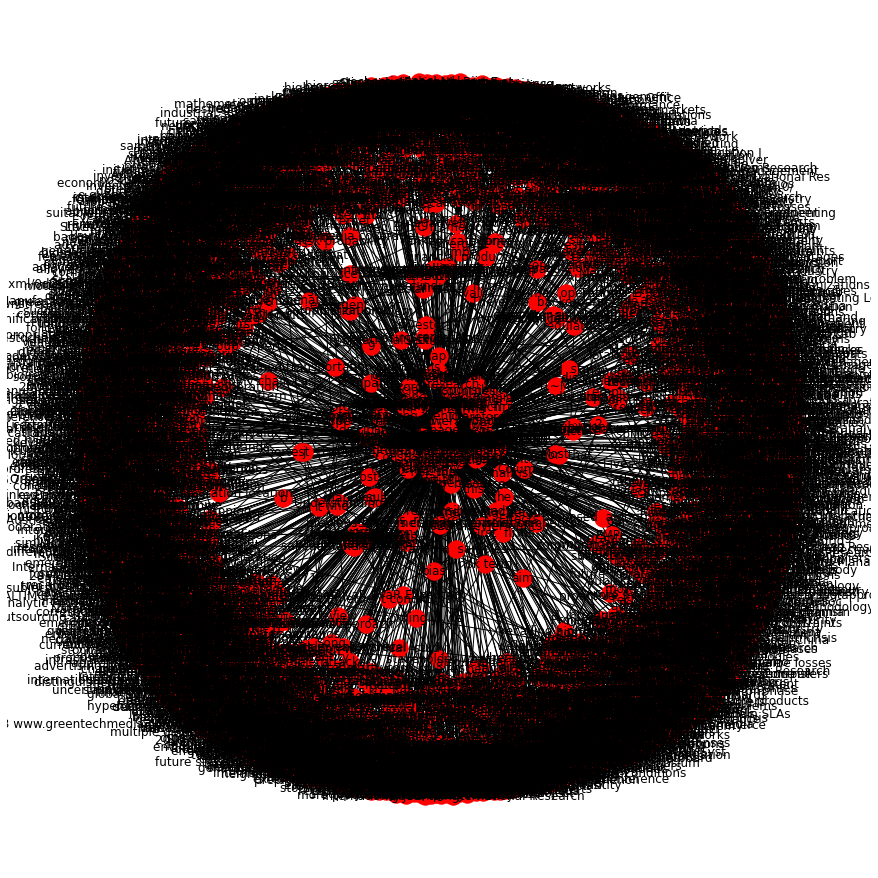

In [53]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='red', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

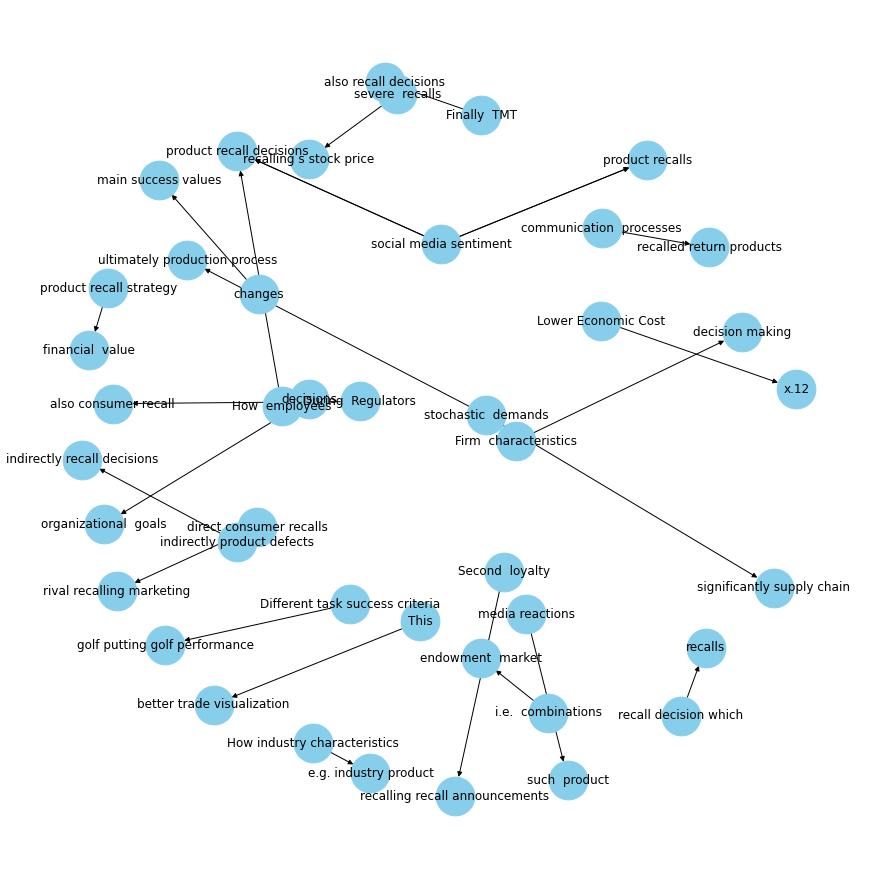

In [54]:

G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="affect"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

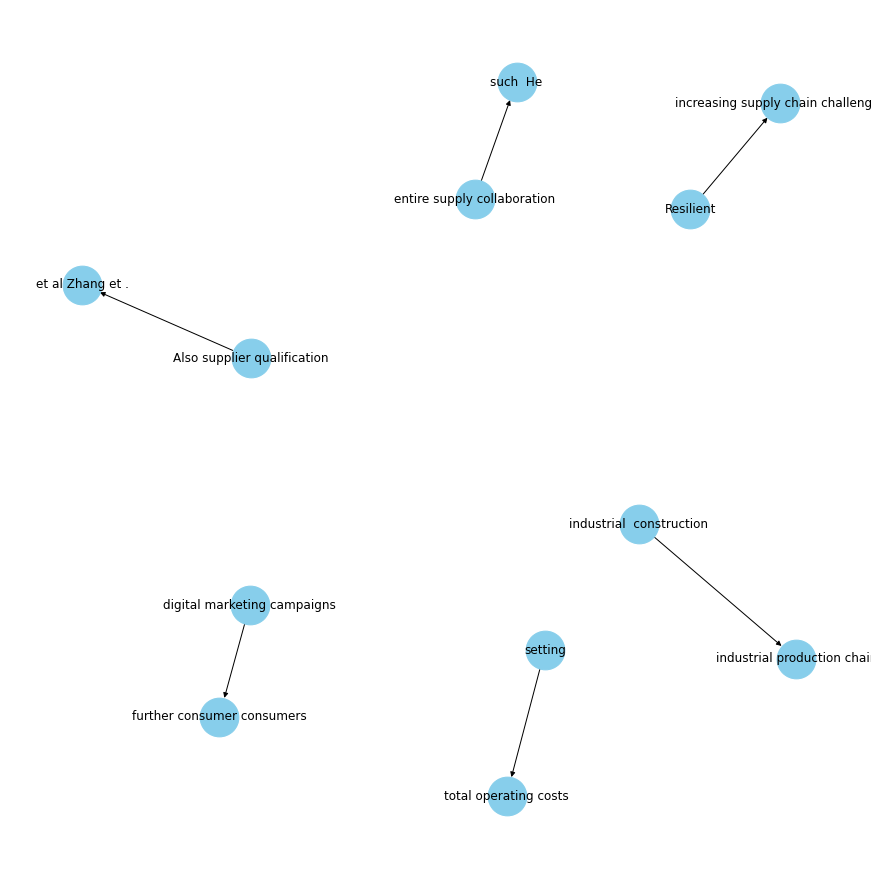

In [55]:

G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="improve"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

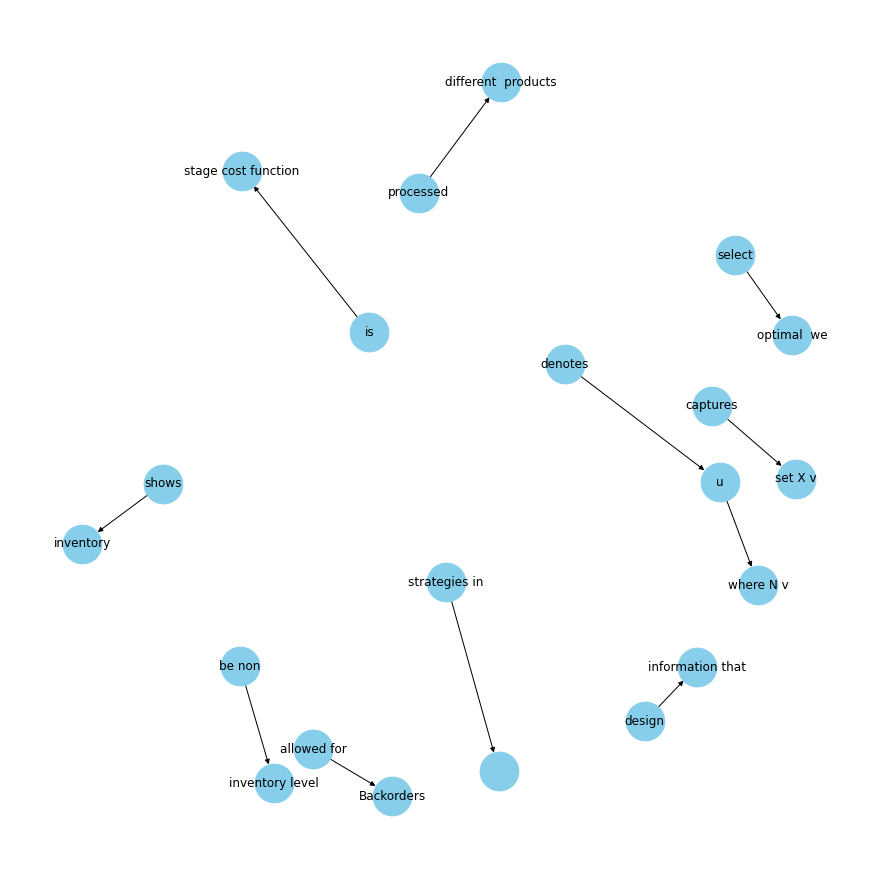

In [91]:
G=nx.from_pandas_edgelist(kg_df[kg_df['target']=="supply chain"], "edge", "source",
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

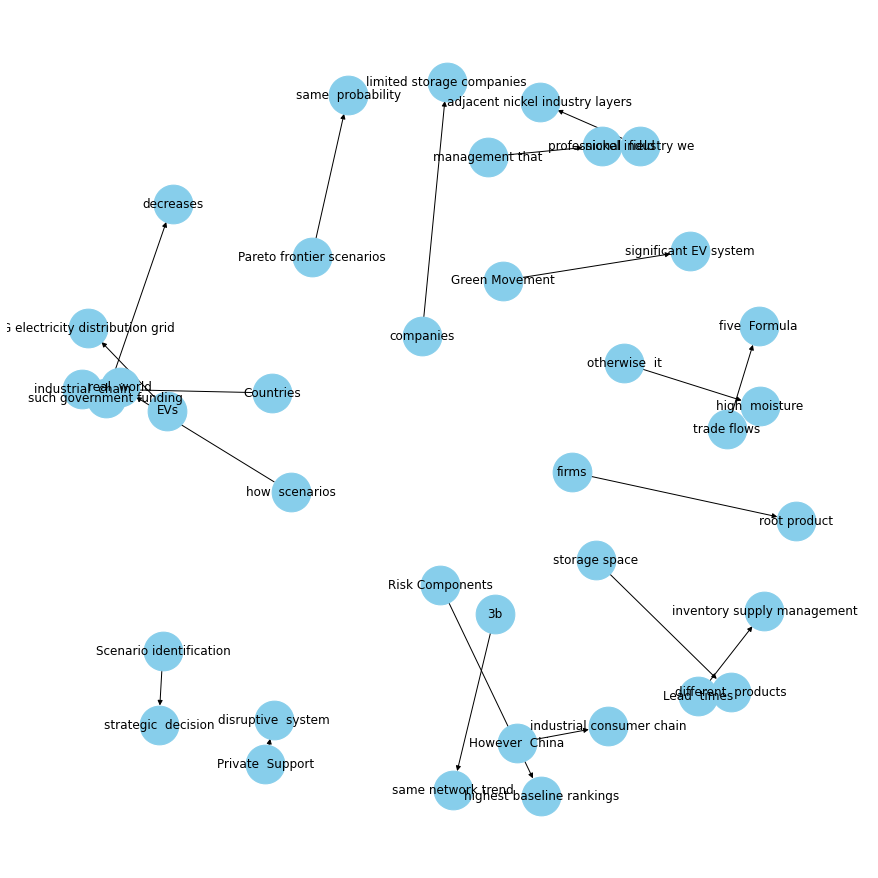

In [68]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="have"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

# USING LDA TOPIC MODELING

In [ ]:
#pip install pyLDAvis


In [ ]:
import numpy as np
import pandas as pd
import json
import glob

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy for lemmatization
import spacy
from nltk.corpus import stopwords

#vis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
def load_data(file):
    with open (file, "r", encoding="utf-8") as f:
        data = json.load(f) 
    return (data)

def write_data(file, data):
    with open (file, "w", encoding="utf-8") as f:
        json.dump(data, f, indent=4)

In [ ]:
stopwords = stopwords.words("english")

In [ ]:
print (stopwords)

In [ ]:

#data = load_data("df.json")["texts"]

#print (data[0][0:90])


In [ ]:
df=search_df["texts"]

In [ ]:
#df['texts']=df['texts'].astype(str)
search_df.to_json("data.json", orient='index')
print(search_df)

In [ ]:
data = load_data("data.json")
#print (data[2])


In [ ]:
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return (texts_out)


lemmatized_texts = lemmatization(data)
print (lemmatized_texts[0][0:90])

In [ ]:
print (lemmatized_texts)